In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot  as plt
from sklearn import tree
from collections import Counter
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from scipy import stats
from sklearn.model_selection import cross_val_predict, train_test_split, cross_val_score, RepeatedKFold, KFold, cross_validate, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix, precision_recall_curve, make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from numpy import mean, std
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import warnings
from sklearn.cluster import KMeans, AgglomerativeClustering
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
import xgboost 
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from Analysis_functions import *
pd.set_option('display.max_colwidth', None)
from itertools import repeat
warnings.filterwarnings('ignore')

[NbConvertApp] Converting notebook Analysis_functions.ipynb to script
[NbConvertApp] Writing 15076 bytes to Analysis_functions.py


Creating lists for table with final results at the very end, 4 metrics used for models evaluation:
* precision
* recall
* f1 score
* accuracy
* specificity

# all features
train-test split, 20% of samples are test, seed is not random

proportions between 1 and 0 class are the same in both test and train sets

In [2]:
oversample = SMOTE()

 
WAVE:  1
Counter({1: 2839, 0: 777})
DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=100)
 


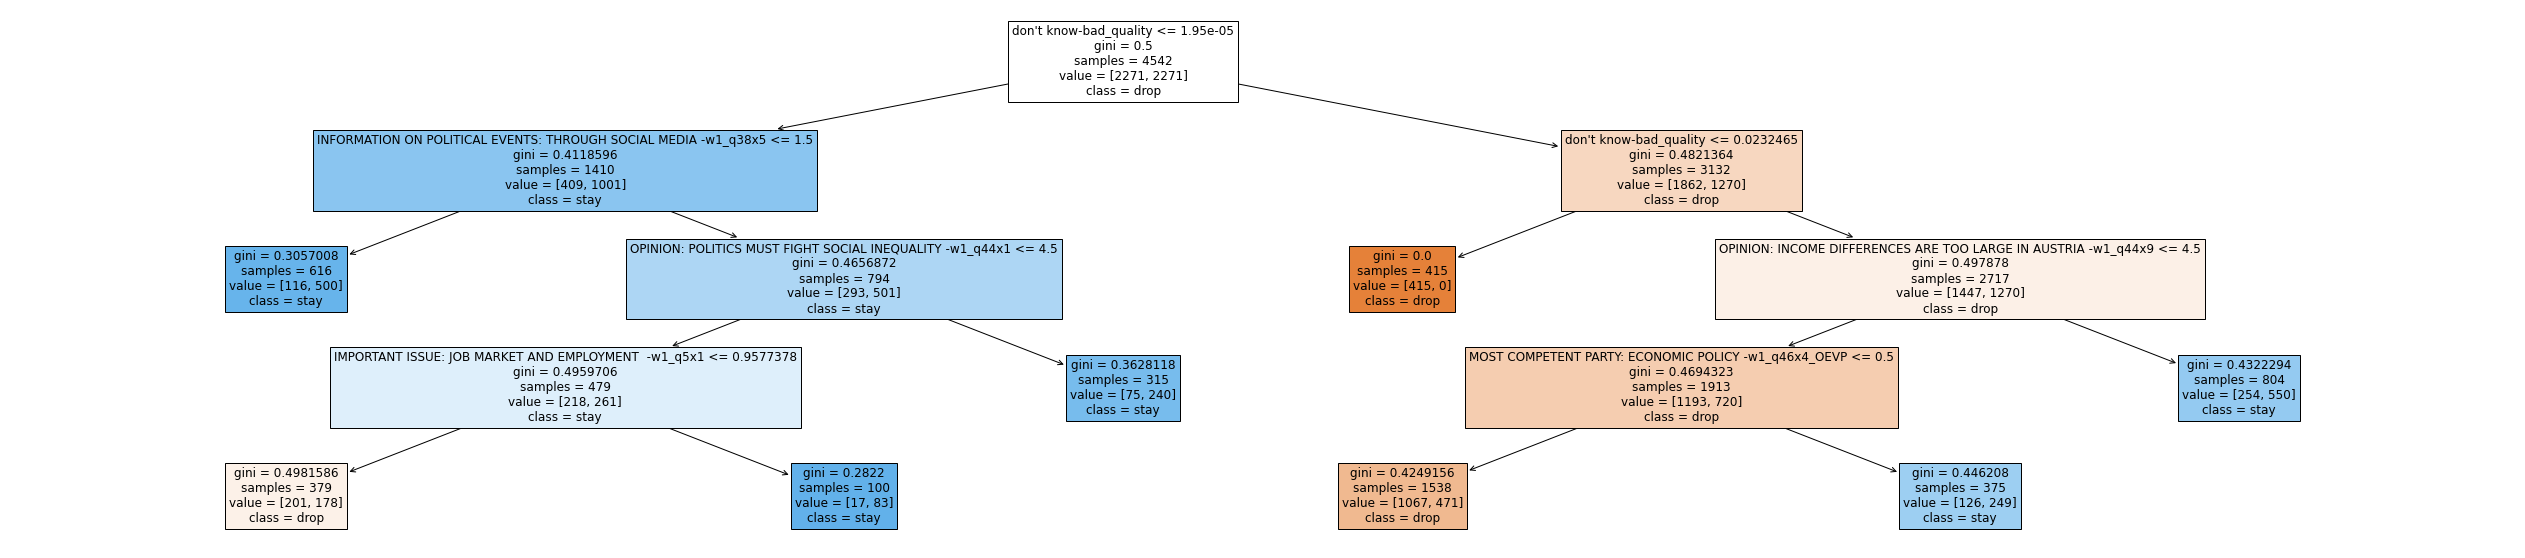

The most important features and its coefficients obtained by logistic regression:
GENDER -sd3_Male :  0.323
GENDER -sd3_Female :  0.299
timeOfResponding_worktime :  0.294
UNION MEMBERSHIP -sd21_no :  0.263
SNAP ELECTION: WHO IS RESPONSIBLE -w1_q29_don't know :  0.255
KNOWLEDGE: SOPHIE KARMASIN -w1_q33x2_OEVP :  0.241
timeOfResponding_eveningtime :  0.233
KNOWLEDGE: SONJA HAMMERSCHMID -w1_q33x3_SPOE :  0.227
RELIGIOUS AFFILIATION -sd8_none :  0.226
CLOSER TO ONE PARTY THAN TO ANOTHER -w1_q18_no :  0.21
KNOWLEDGE: HANS-PETER DOSKOZIL -w1_q33x1_OEVP :  0.209
KNOWLEDGE: HERBERT KICKL -w1_q33x4_don't know person :  0.208
KNOWLEDGE: HANS-PETER DOSKOZIL -w1_q33x1_SPOE :  0.208
OTHER OCCUPATION -sd12_none of the above :  0.207
ADDITIONAL OCCUPATION -sd13_no :  0.203
KNOWLEDGE: HERBERT KICKL -w1_q33x4_don't know which party :  0.203
CLOSENESS TO A POLITICAL PARTY -w1_q17_yes :  0.202
KNOWLEDGE: SONJA HAMMERSCHMID -w1_q33x3_don't know which party :  0.199
UNION MEMBERSHIP -sd21_yes :  0.195
CLOS

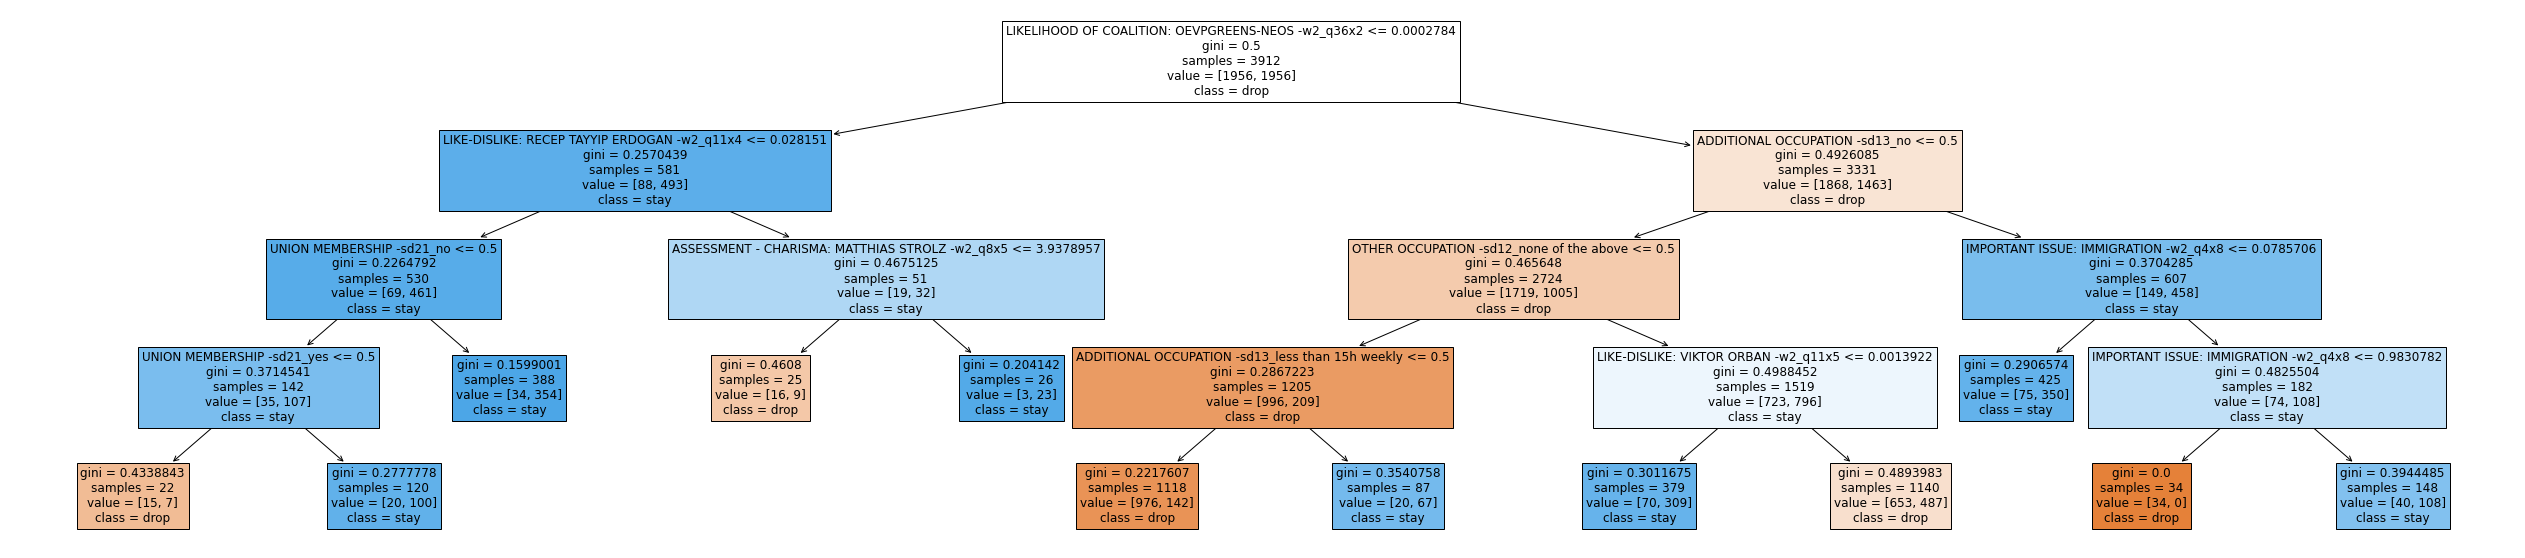

The most important features and its coefficients obtained by logistic regression:
days_to_respond :  -0.779
GENDER -sd3_Female :  0.641
LEFT-RIGHT PLACEMENT: SEBASTIAN KURZ -w2_q9x2_don't know :  0.609
LEFT-RIGHT PLACEMENT: CHRISTIAN KERN -w2_q9x1_on the left wing of his party :  0.605
LEFT-RIGHT PLACEMENT: CHRISTIAN KERN -w2_q9x1_don't know :  0.568
GENDER -sd3_Male :  0.56
LEFT-RIGHT PLACEMENT: SEBASTIAN KURZ -w2_q9x2_in the centre of his party :  0.527
timeOfResponding_morningtime :  0.527
UNION MEMBERSHIP -sd21_no :  0.526
RELIGIOUS AFFILIATION -sd8_none :  0.5
READ ELECTION POLLS (LAST WEEK) -w2_q40_yes :  0.492
READ ELECTION POLLS (LAST WEEK) -w2_q40_don't know :  0.484
timeOfResponding_eveningtime :  0.482
LEFT-RIGHT PLACEMENT: HEINZCHRISTIAN STRACHE -w2_q9x3_in the centre of his party :  0.468
ADDITIONAL OCCUPATION -sd13_no :  0.453
TYPE OF OCCUPATION -sd14_self-employed without employees :  0.436
timeOfResponding_worktime :  0.436
OPINION: EUROPEAN AND MUSLIM LIFESTYLE ARE EAS

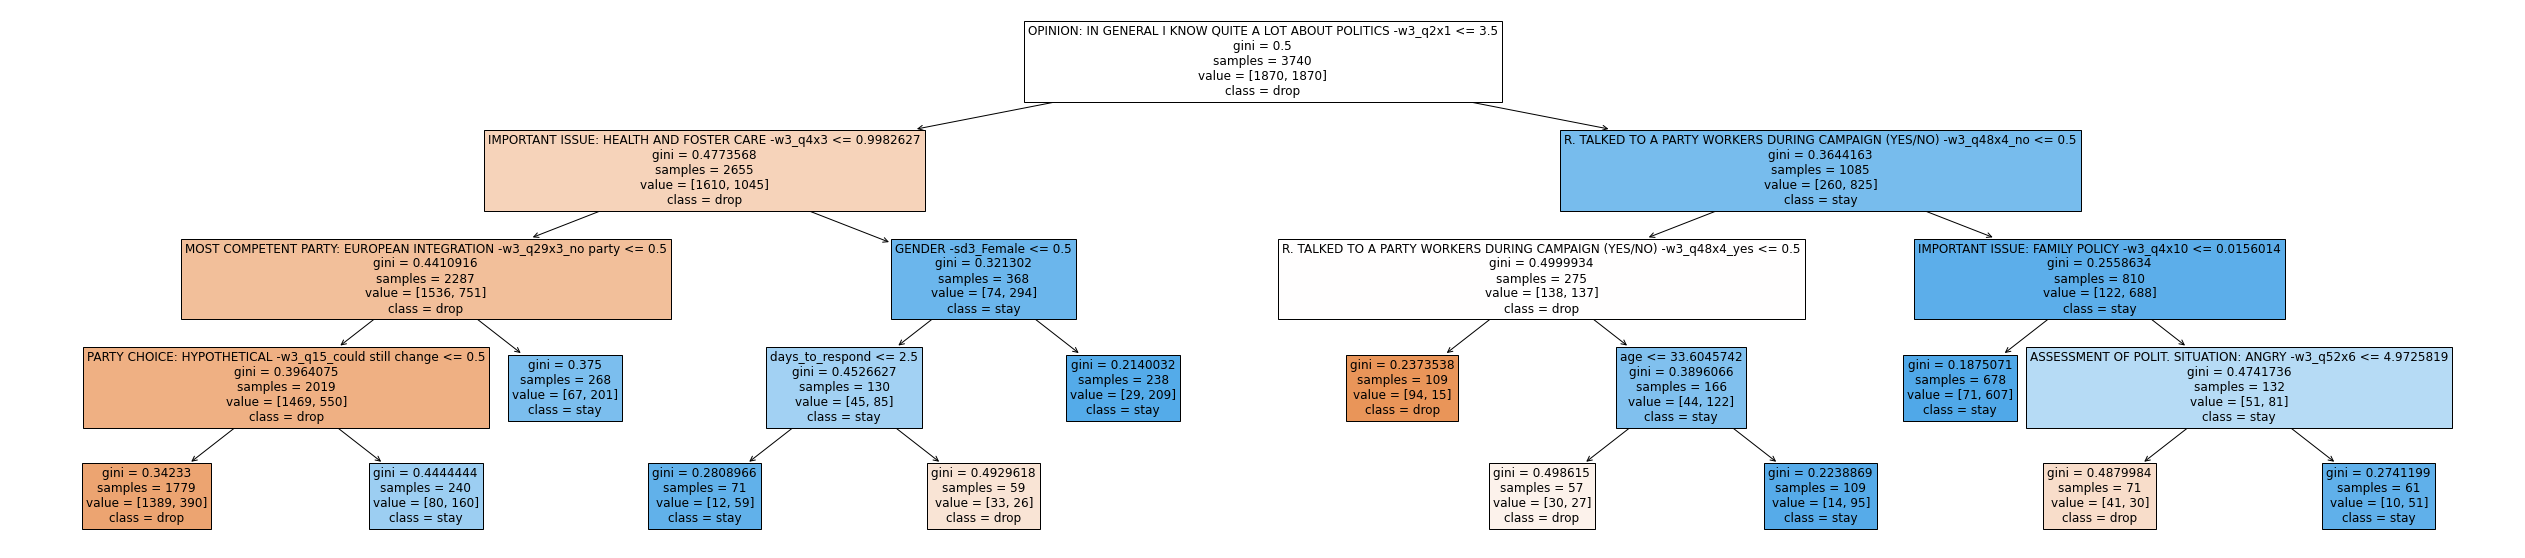

The most important features and its coefficients obtained by logistic regression:
days_to_respond :  -0.676
GENDER -sd3_Female :  0.657
whether_dropped_before :  -0.651
timeOfResponding_eveningtime :  0.624
UNION MEMBERSHIP -sd21_no :  0.612
R. SAW PARTY CAMPAIGN ADS ON TV(YES/NO) -w3_q48x6_no :  0.581
GENDER -sd3_Male :  0.506
PARTY CHOICE: HYPOTHETICAL -w3_q15_could still change :  0.476
RELIGIOUS AFFILIATION -sd8_none :  0.474
RELIGIOUS AFFILIATION -sd8_Roman-Catholic church :  0.459
FEDERAL STATE -sd4_Carinthia :  0.458
R. VISITED FACEBOOK PAGE OF PARTIES/CANDIDATES DURING CAMPAIGN (YES/NO) -w3_q50x2_yes :  0.454
OTHER OCCUPATION -sd12_none of the above :  0.441
R. RECEIVED LETTER/FLYER/E-MAIL DURING CAMPAIGN (YES/NO) -w3_q48x1_no :  0.439
PARTY CHOICE: PROSPECTIVE -w3_q14_FPOE :  0.429
R. RECEIVED LETTER/FLYER/E-MAIL DURING CAMPAIGN (YES/NO) -w3_q48x1_yes :  0.429
CURRENT PERSONAL SITUATION -sd10_employed :  0.421
R. SAW PARTY CAMPAIGN ADS ON TV(YES/NO) -w3_q48x6_yes :  0.413
ADDI

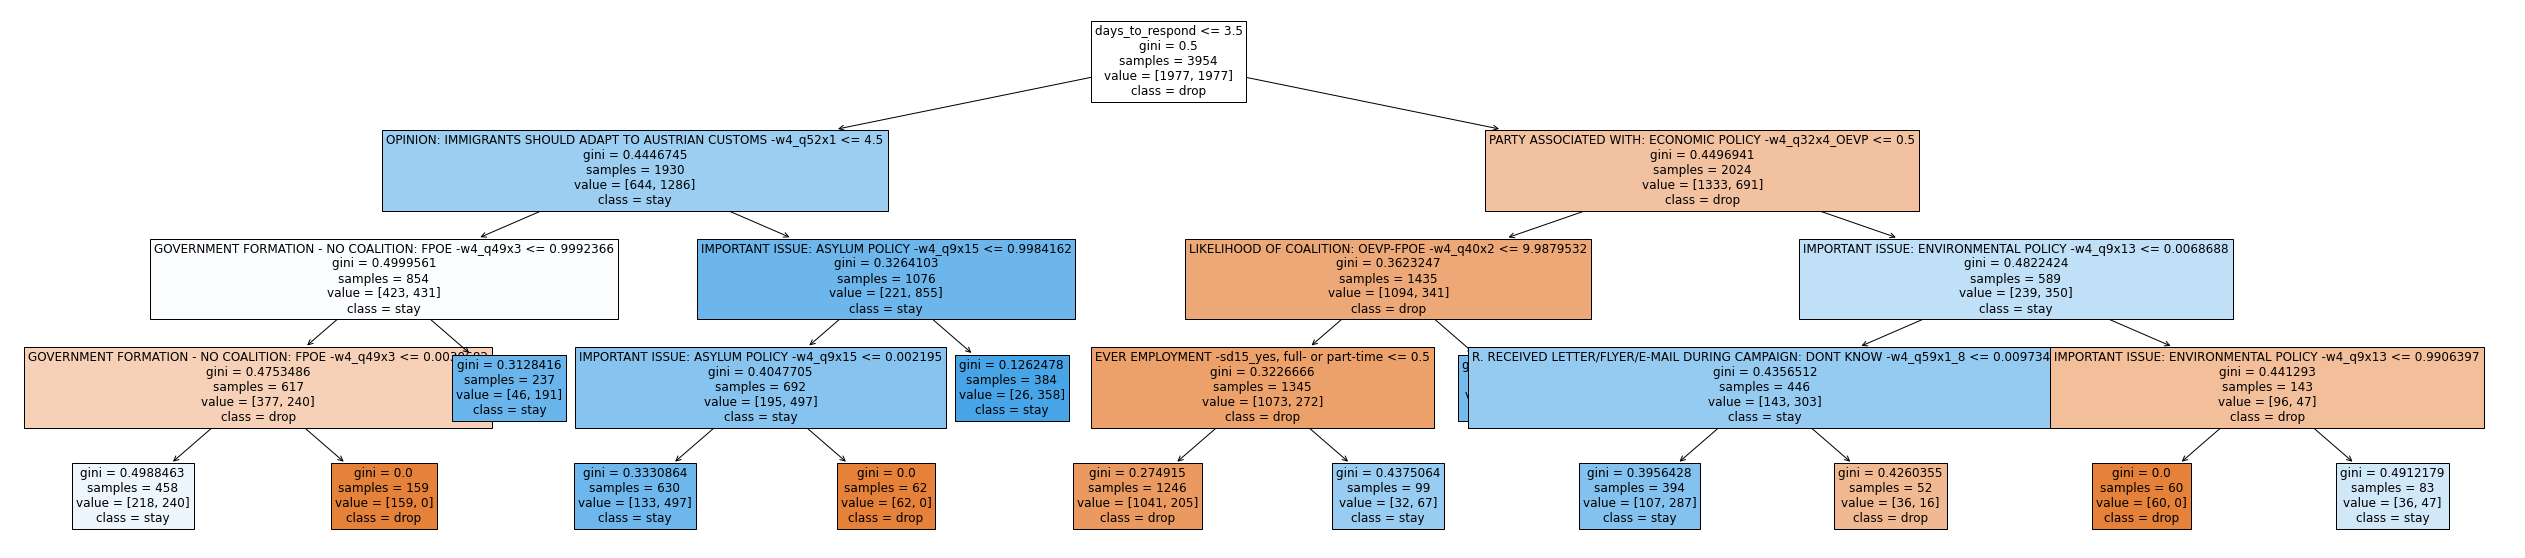

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -0.911
days_to_respond :  -0.63
GENDER -sd3_Male :  0.582
GENDER -sd3_Female :  0.536
R. RECEIVED LETTER/FLYER/E-MAIL DURING CAMPAIGN (YES/NO) -w4_q58x1_no :  0.53
timeOfResponding_worktime :  0.505
RELIGIOUS AFFILIATION -sd8_Roman-Catholic church :  0.499
LEFT-RIGHT PLACEMENT: HEINZCHRISTIAN STRACHE -w4_q14x3_don't know :  0.496
LEFT-RIGHT PLACEMENT: HEINZCHRISTIAN STRACHE -w4_q14x3_in the centre of his party :  0.476
UNION MEMBERSHIP -sd21_no :  0.454
LEFT-RIGHT PLACEMENT: CHRISTIAN KERN -w4_q14x1_on the left wing of his party :  0.446
GOVERNMENT FORMATION - NO COALITION: THE GREENS -w4_q49x4 :  -0.436
LEFT-RIGHT PLACEMENT: SEBASTIAN KURZ -w4_q14x2_don't know :  0.43
FEDERAL STATE -sd4_Lower Austria :  0.428
LEFT-RIGHT PLACEMENT: SEBASTIAN KURZ -w4_q14x2_on the right wing of his party :  0.426
LEFT-RIGHT PLACEMENT: CHRISTIAN KERN -w4_q14x1_don't know :  0.425
FEDERAL STATE -sd4

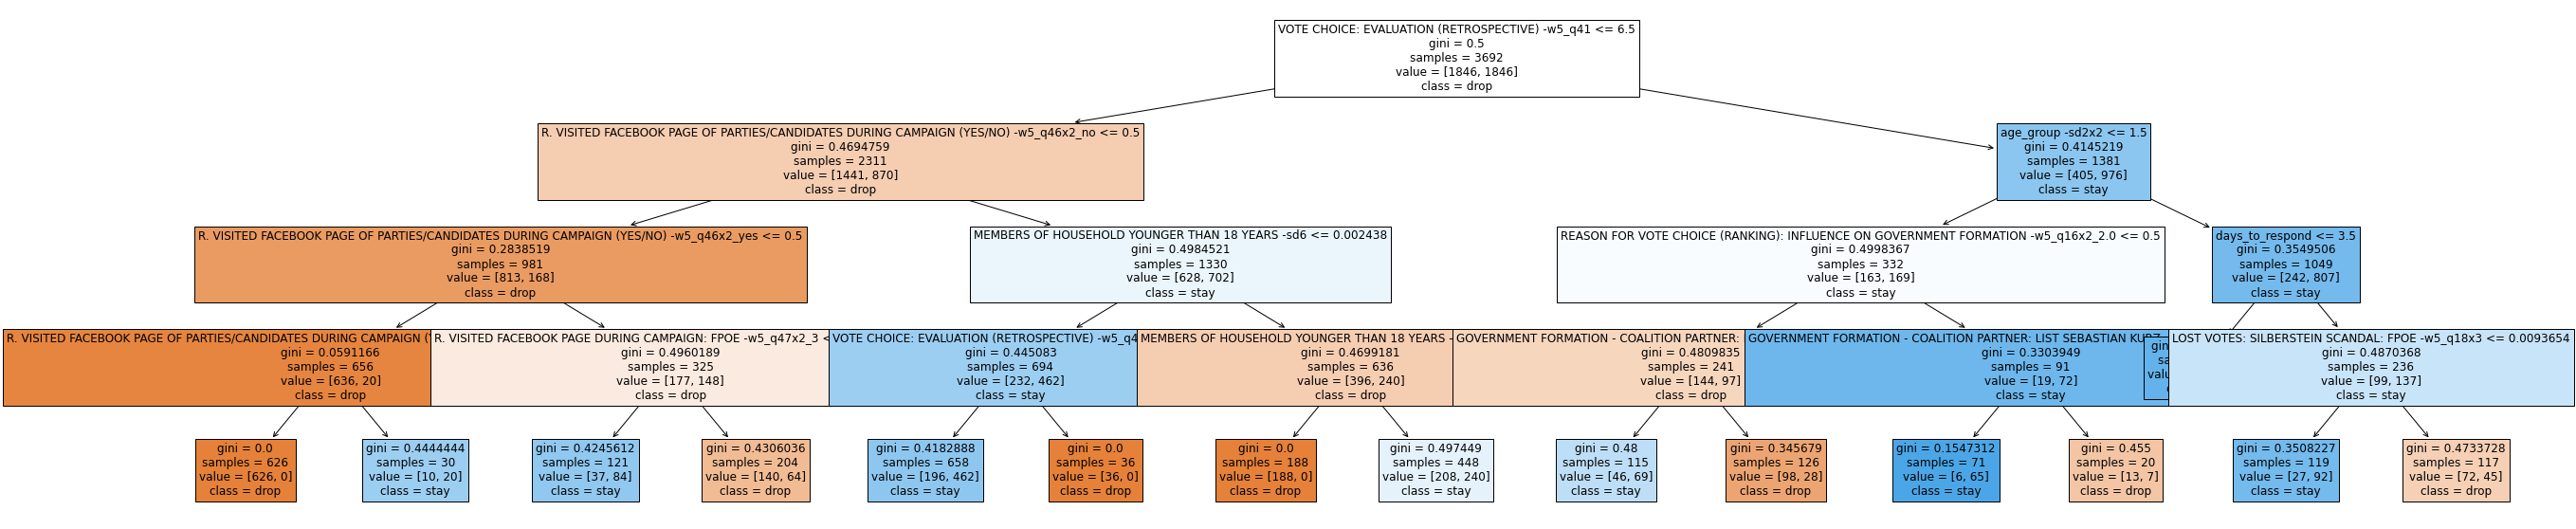

The most important features and its coefficients obtained by logistic regression:
whether_dropped_before :  -0.289
R. VISITED FACEBOOK PAGE OF PARTIES/CANDIDATES DURING CAMPAIGN (YES/NO) -w5_q46x2_no :  0.281
GENDER -sd3_Female :  0.277
GENDER -sd3_Male :  0.274
REASON FOR VOTE CHOICE (RANKING): INFLUENCE ON GOVERNMENT FORMATION -w5_q16x2_2.0 :  0.268
LEAVING THE EU -w5_q24_Austria staying in the EU :  0.266
POLITICAL PARTICIPATION: COLLECTION OF SIGNITURES (RETROSPECTIVE) -w5_q50x1_no :  0.264
POLITICAL PARTICIPATION: PRODUCTS BOUGHT (RETROSPECTIVE) -w5_q50x5_yes :  0.263
REASON FOR VOTE CHOICE (RANKING): EXPRESS CONVICTION -w5_q16x1_1.0 :  0.255
READ ELECTION POLLS (WEEK BEFORE THE ELECTION) -w5_q35_no :  0.252
RELIGIOUS AFFILIATION -sd8_none :  0.241
timeOfResponding_eveningtime :  0.241
POLITICAL PARTICIPATION: PERSONAL CONTACT WITH POLITICIAN (PROSPECTIVE) -w5_q51x4_yes :  0.237
R. RECEIVED LETTER/FLYER/E-MAIL DURING CAMPAIGN (YES/NO) -w5_q44x1_yes :  0.234
POLITICAL PARTICIPATION

In [3]:
waves = ['1', '2', '3', '4', '5']
names = ['drop', 'stay']
for wave in waves:
    
    df = pd.read_csv('../../data/data_online_personal_w' + wave + '.csv')
    political_data = pd.read_csv('../../data/data_online_political_w' + wave + '.csv')
    
    df = concat_df(df, political_data)
    y = df['panelpat']
    dte = df.filter(like='_dte', axis=1)
    X = df.drop(['panelpat', 'id', dte.columns[0]], axis=1)
    cols = X.columns
    print(' ')
    print('WAVE: ', wave)
    print(Counter(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    
    X_train, y_train = oversample.fit_resample(X_train, y_train)
   
    analysis_all_models(X_train, y_train, X_test, y_test, names)
    

## personal and engineered features + gender/age_group interaction

 
WAVE:  1
Personal and engineered features:
Counter({1: 2839, 0: 777})
DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=20)
 


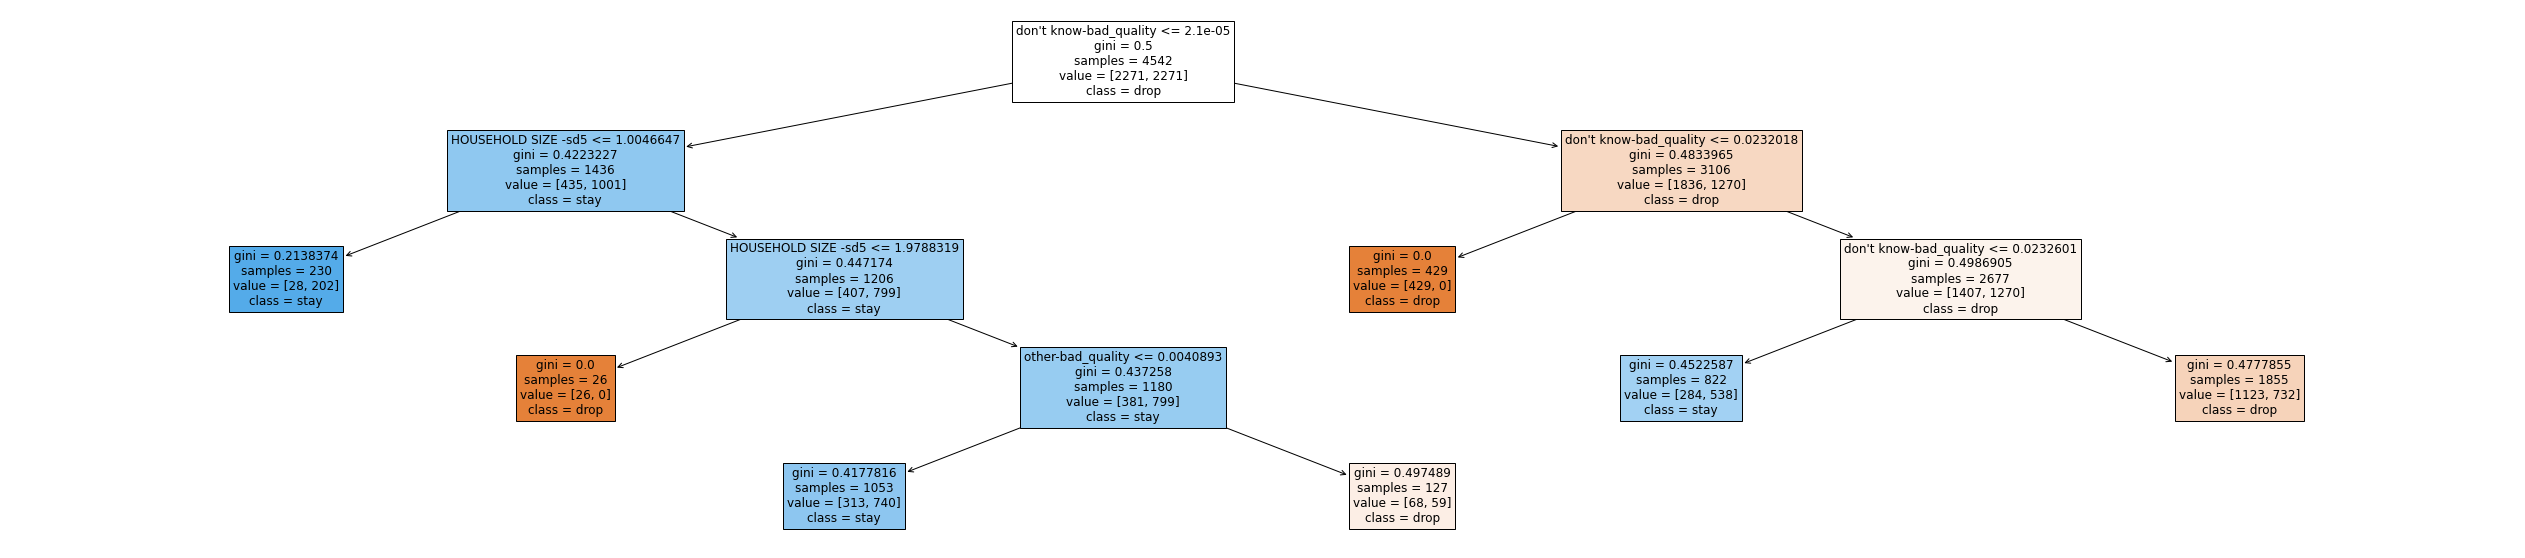

The most important features and its coefficients obtained by logistic regression:
PREVIOUS TYPE OF OCCUPATION -sd16_freelance worker :  8.555
FEDERAL STATE -sd4_Burgenland :  7.059
FEDERAL STATE -sd4_Salzburg :  7.018
FEDERAL STATE -sd4_Carinthia :  7.003
FEDERAL STATE -sd4_Vorarlberg :  6.907
PREVIOUS TYPE OF OCCUPATION -sd16_farmer :  6.868
FEDERAL STATE -sd4_Styria :  6.847
GENDER -sd3_Male :  6.842
FEDERAL STATE -sd4_Tyrol :  6.829
FEDERAL STATE -sd4_Upper Austria :  6.671
GENDER -sd3_Female :  6.671
FEDERAL STATE -sd4_Lower Austria :  6.664
FEDERAL STATE -sd4_Vienna :  6.539
UNION MEMBERSHIP -sd21_no :  6.477
UNION MEMBERSHIP -sd21_yes :  6.371
UNION MEMBERSHIP -sd21_don't know :  6.303
ADDITIONAL OCCUPATION -sd13_in vocational training :  5.922
CURRENT PERSONAL SITUATION -sd10_employed :  5.85
GENDER -sd3_Prefer not to say :  5.703
PREVIOUS TYPE OF OCCUPATION -sd16_civil servant :  5.42
voting_age_awareness_w1 :  0.127
whether_dropped_before :  0.0
know_politicians_ratio :  0.354

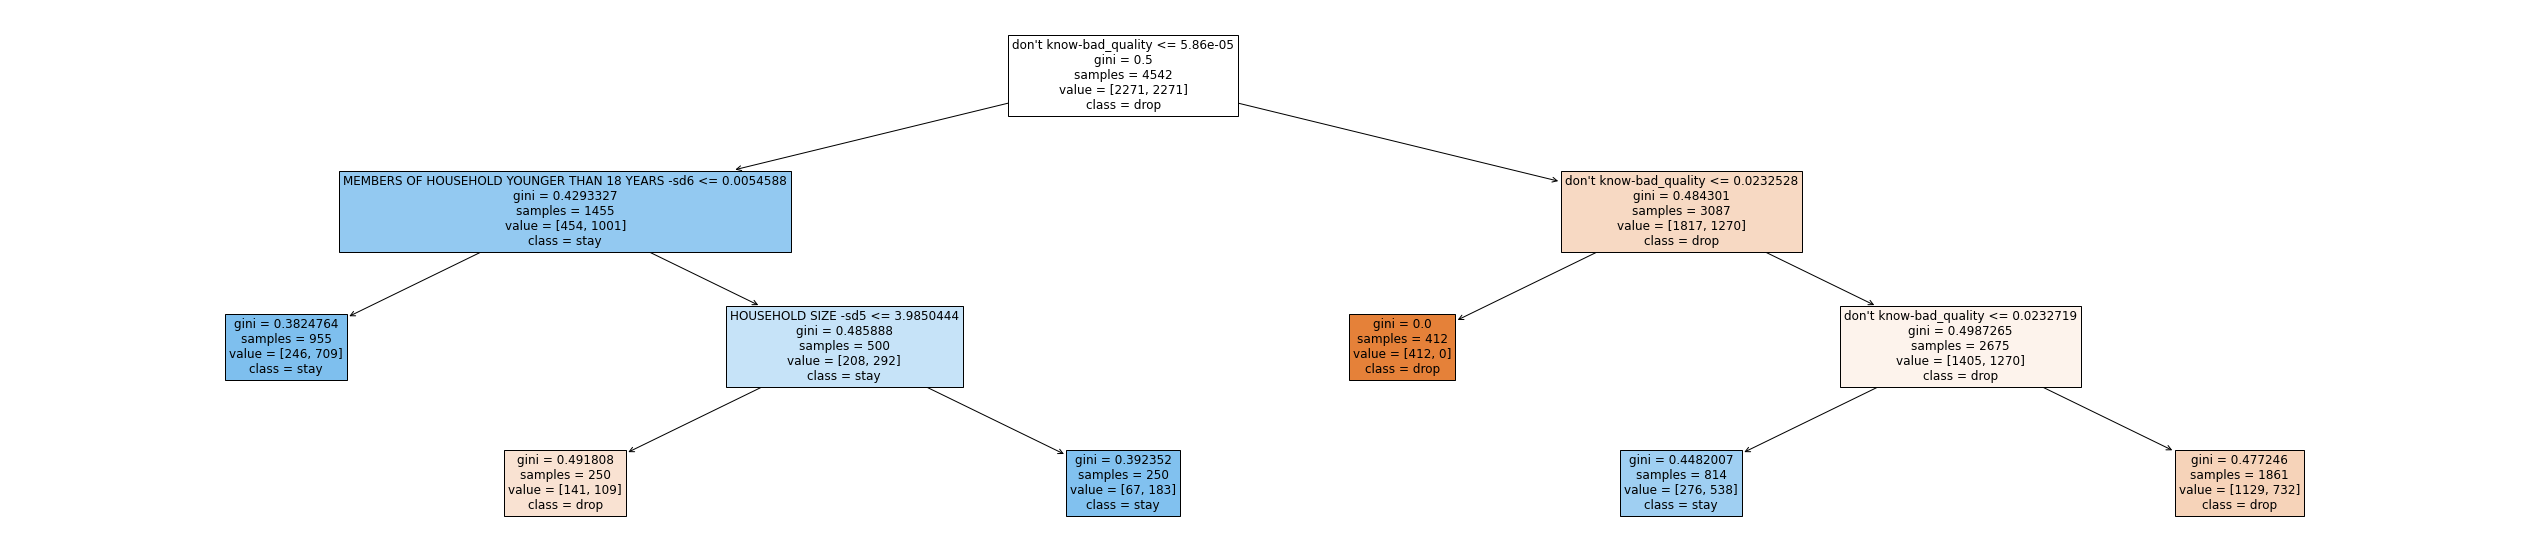

The most important features and its coefficients obtained by logistic regression:
0.0 :  21.663
age_group -sd2x2_Male :  20.275
age_group -sd2x2_Female :  20.004
age_group -sd2x2_Prefer not to say :  18.196
1.0 :  17.372
2.0 :  13.396
PREVIOUS TYPE OF OCCUPATION -sd16_freelance worker :  12.511
CURRENT PERSONAL SITUATION -sd10_employed :  11.65
CURRENT PERSONAL SITUATION -sd10_military/civilian service, voluntary social year :  11.269
PREVIOUS TYPE OF OCCUPATION -sd16_farmer :  10.846
3.0 :  9.033
ADDITIONAL OCCUPATION -sd13_in vocational training :  8.984
FEDERAL STATE -sd4_Carinthia :  8.974
FEDERAL STATE -sd4_Burgenland :  8.92
FEDERAL STATE -sd4_Salzburg :  8.909
FEDERAL STATE -sd4_Vorarlberg :  8.796
FEDERAL STATE -sd4_Tyrol :  8.709
FEDERAL STATE -sd4_Styria :  8.651
FEDERAL STATE -sd4_Upper Austria :  8.536
FEDERAL STATE -sd4_Vienna :  8.516
voting_age_awareness_w1 :  0.193
whether_dropped_before :  0.0
know_politicians_ratio :  0.239
 
WAVE:  2
Personal and engineered features:

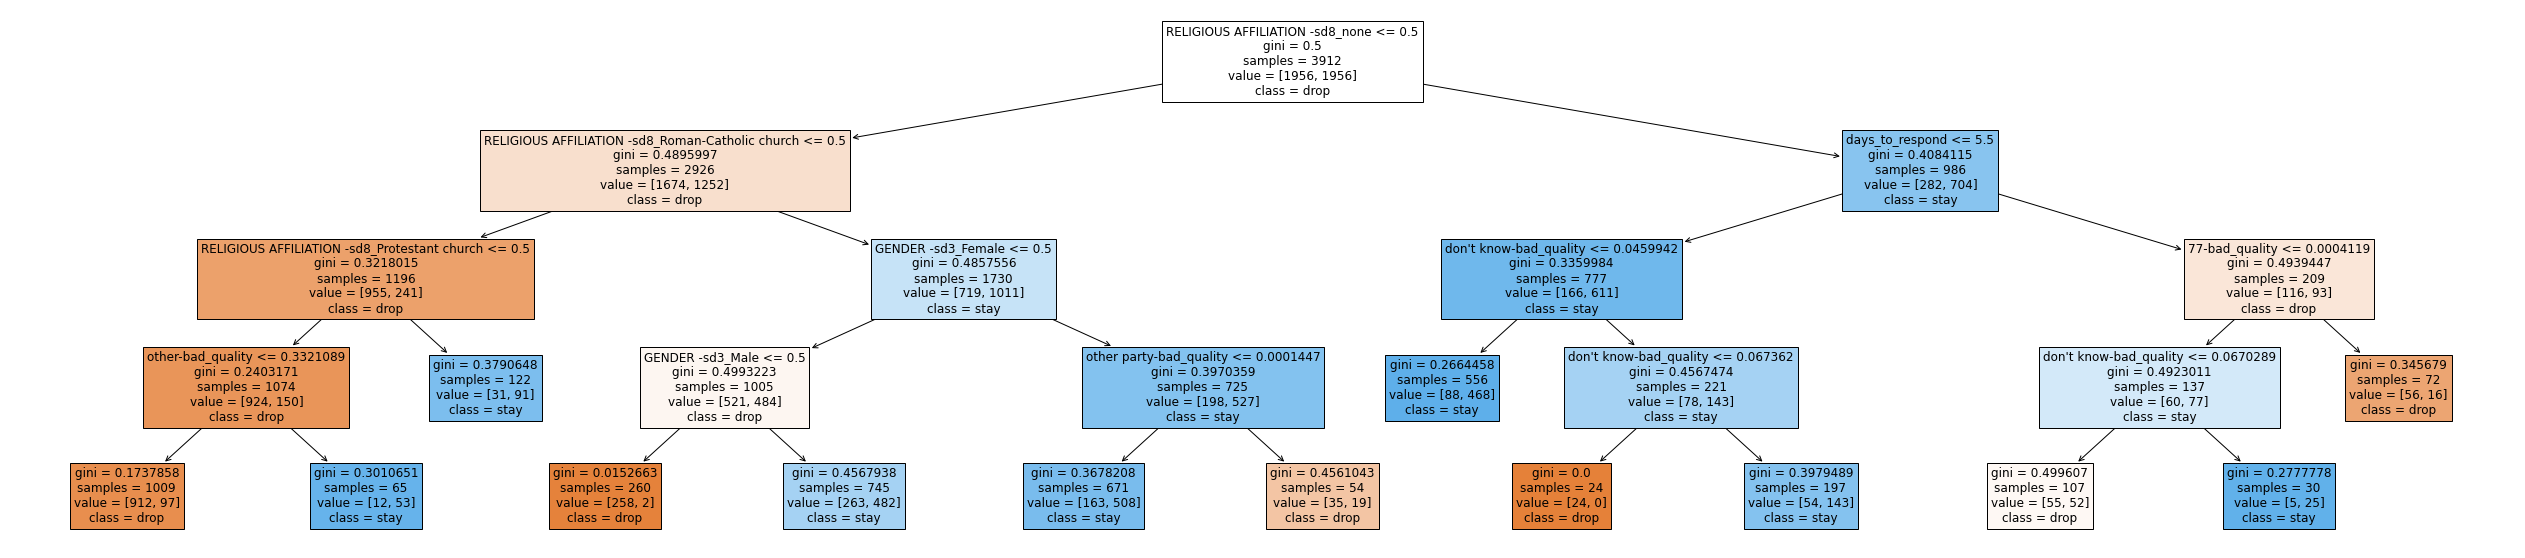

The most important features and its coefficients obtained by logistic regression:
CURRENT PERSONAL SITUATION -sd10_military/civilian service, voluntary social year :  18.006
PREVIOUS TYPE OF OCCUPATION -sd16_freelance worker :  15.839
UNION MEMBERSHIP -sd21_no :  15.216
UNION MEMBERSHIP -sd21_yes :  15.141
UNION MEMBERSHIP -sd21_don't know :  15.094
GENDER -sd3_Female :  14.967
GENDER -sd3_Male :  14.77
GENDER -sd3_Prefer not to say :  14.375
FEDERAL STATE -sd4_Vorarlberg :  12.114
FEDERAL STATE -sd4_Tyrol :  11.846
FEDERAL STATE -sd4_Burgenland :  11.813
FEDERAL STATE -sd4_Lower Austria :  11.782
FEDERAL STATE -sd4_Carinthia :  11.701
FEDERAL STATE -sd4_Vienna :  11.691
FEDERAL STATE -sd4_Styria :  11.627
FEDERAL STATE -sd4_Upper Austria :  11.486
FEDERAL STATE -sd4_Salzburg :  11.448
EVER EMPLOYMENT -sd15_no, neither :  10.179
Country of birth, father -sd20_Bosnia, Croatia, Serbia :  10.04
Country of birth, mother -sd19_Turkey :  9.241
whether_dropped_before :  0.0
know_politicians_r

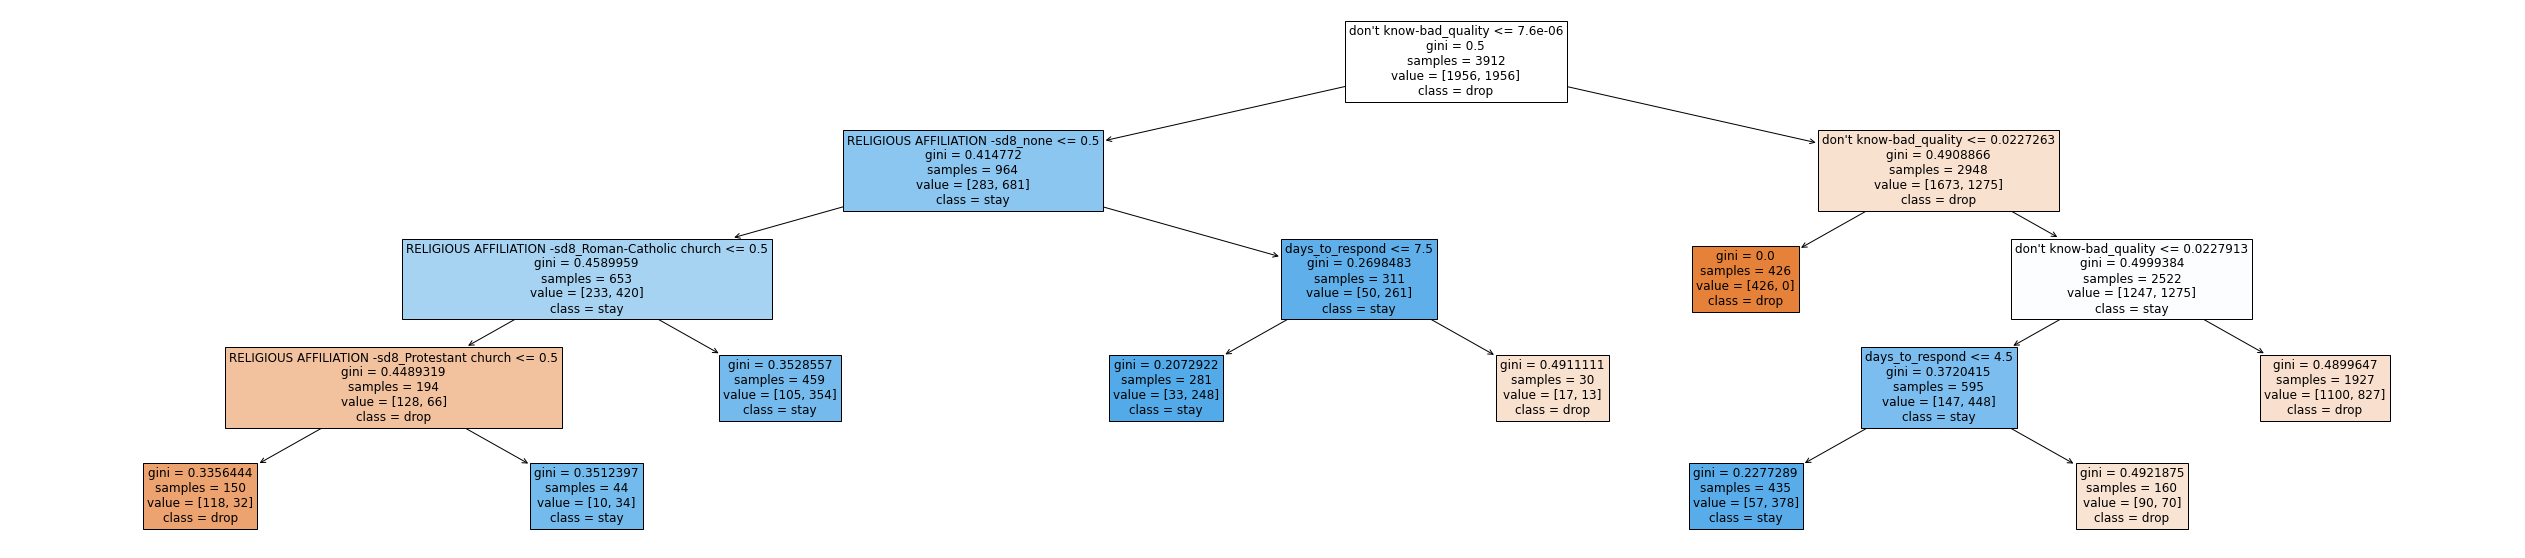

The most important features and its coefficients obtained by logistic regression:
age_group -sd2x2_Prefer not to say :  27.382
age_group -sd2x2_Female :  25.638
age_group -sd2x2_Male :  25.382
0.0 :  24.929
1.0 :  20.072
CURRENT PERSONAL SITUATION -sd10_military/civilian service, voluntary social year :  16.426
2.0 :  15.659
PREVIOUS TYPE OF OCCUPATION -sd16_freelance worker :  14.39
UNION MEMBERSHIP -sd21_no :  12.299
UNION MEMBERSHIP -sd21_don't know :  12.252
UNION MEMBERSHIP -sd21_yes :  12.227
FEDERAL STATE -sd4_Vorarlberg :  12.155
FEDERAL STATE -sd4_Tyrol :  12.038
FEDERAL STATE -sd4_Burgenland :  11.833
FEDERAL STATE -sd4_Lower Austria :  11.829
FEDERAL STATE -sd4_Carinthia :  11.761
FEDERAL STATE -sd4_Vienna :  11.701
FEDERAL STATE -sd4_Styria :  11.635
FEDERAL STATE -sd4_Salzburg :  11.607
FEDERAL STATE -sd4_Upper Austria :  11.573
whether_dropped_before :  0.0
know_politicians_ratio :  0.0
 
WAVE:  3
Personal and engineered features:
Counter({1: 2338, 0: 360})
DecisionTreeCl

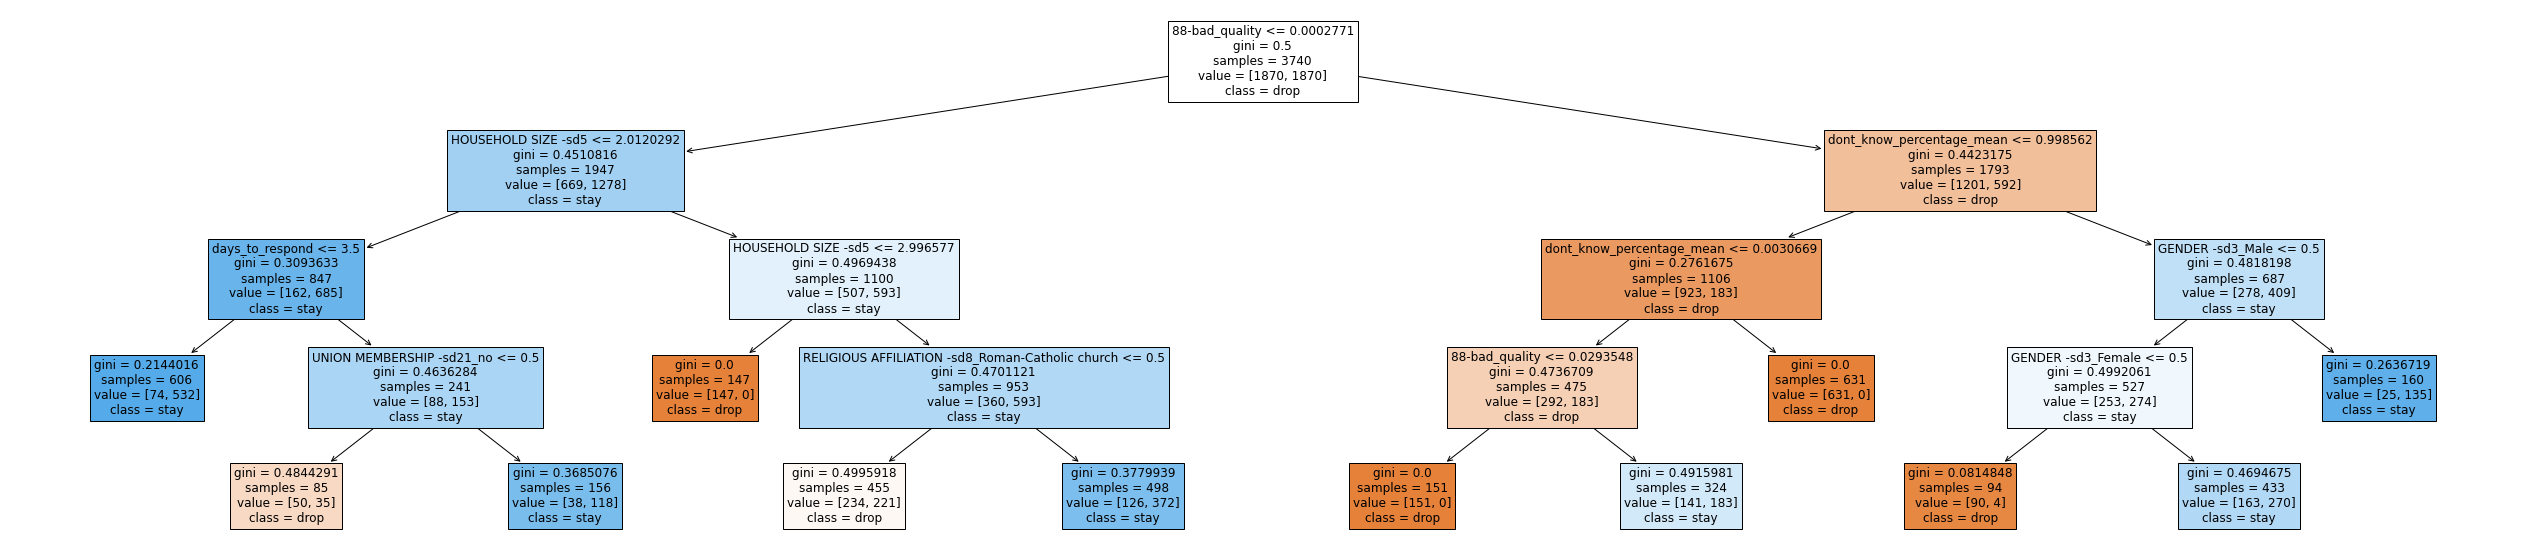

The most important features and its coefficients obtained by logistic regression:
FEDERAL STATE -sd4_Carinthia :  8.015
GENDER -sd3_Prefer not to say :  7.787
FEDERAL STATE -sd4_Salzburg :  7.529
FEDERAL STATE -sd4_Upper Austria :  7.425
FEDERAL STATE -sd4_Burgenland :  7.423
FEDERAL STATE -sd4_Styria :  7.278
FEDERAL STATE -sd4_Lower Austria :  7.249
FEDERAL STATE -sd4_Vienna :  7.144
FEDERAL STATE -sd4_Vorarlberg :  7.007
FEDERAL STATE -sd4_Tyrol :  6.961
Country of birth, mother -sd19_Poland, Slovenia, Czech Republic, Hungary :  6.318
CURRENT PERSONAL SITUATION -sd10_employed :  6.162
GENDER -sd3_Male :  6.12
GENDER -sd3_Female :  5.947
Country of birth, mother -sd19_Bosnia, Croatia, Serbia :  5.793
UNION MEMBERSHIP -sd21_don't know :  5.615
UNION MEMBERSHIP -sd21_no :  5.528
UNION MEMBERSHIP -sd21_yes :  5.328
Country of birth, mother -sd19_Other country :  5.106
PREVIOUS TYPE OF OCCUPATION -sd16_farmer :  4.909
whether_dropped_before :  -1.444
know_politicians_ratio :  0.0
 
Perso

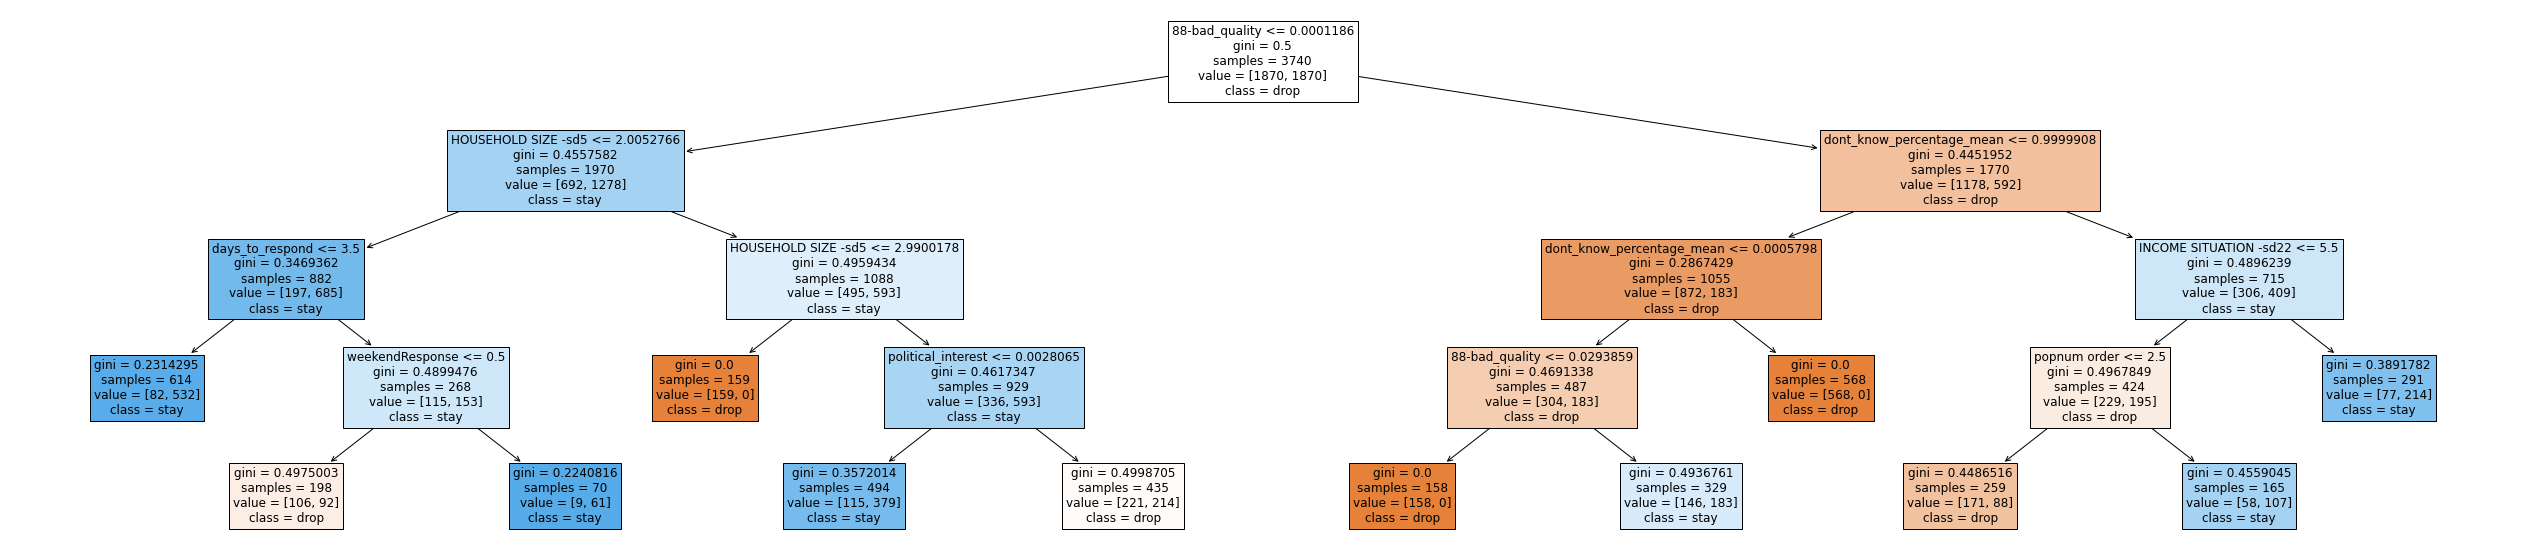

The most important features and its coefficients obtained by logistic regression:
age_group -sd2x2_Prefer not to say :  11.881
age_group -sd2x2_Male :  9.867
0.0 :  9.787
age_group -sd2x2_Female :  9.512
FEDERAL STATE -sd4_Carinthia :  7.769
1.0 :  7.446
FEDERAL STATE -sd4_Salzburg :  7.406
FEDERAL STATE -sd4_Burgenland :  7.132
FEDERAL STATE -sd4_Upper Austria :  7.079
FEDERAL STATE -sd4_Lower Austria :  6.95
FEDERAL STATE -sd4_Styria :  6.913
FEDERAL STATE -sd4_Vorarlberg :  6.747
FEDERAL STATE -sd4_Vienna :  6.693
FEDERAL STATE -sd4_Tyrol :  6.66
UNION MEMBERSHIP -sd21_no :  6.442
UNION MEMBERSHIP -sd21_don't know :  6.416
UNION MEMBERSHIP -sd21_yes :  6.182
Country of birth, mother -sd19_Poland, Slovenia, Czech Republic, Hungary :  6.143
2.0 :  5.826
CURRENT PERSONAL SITUATION -sd10_employed :  5.812
whether_dropped_before :  -1.383
know_politicians_ratio :  0.0
 
WAVE:  4
Personal and engineered features:
Counter({1: 2472, 0: 376})
DecisionTreeClassifier(class_weight='balanced', m

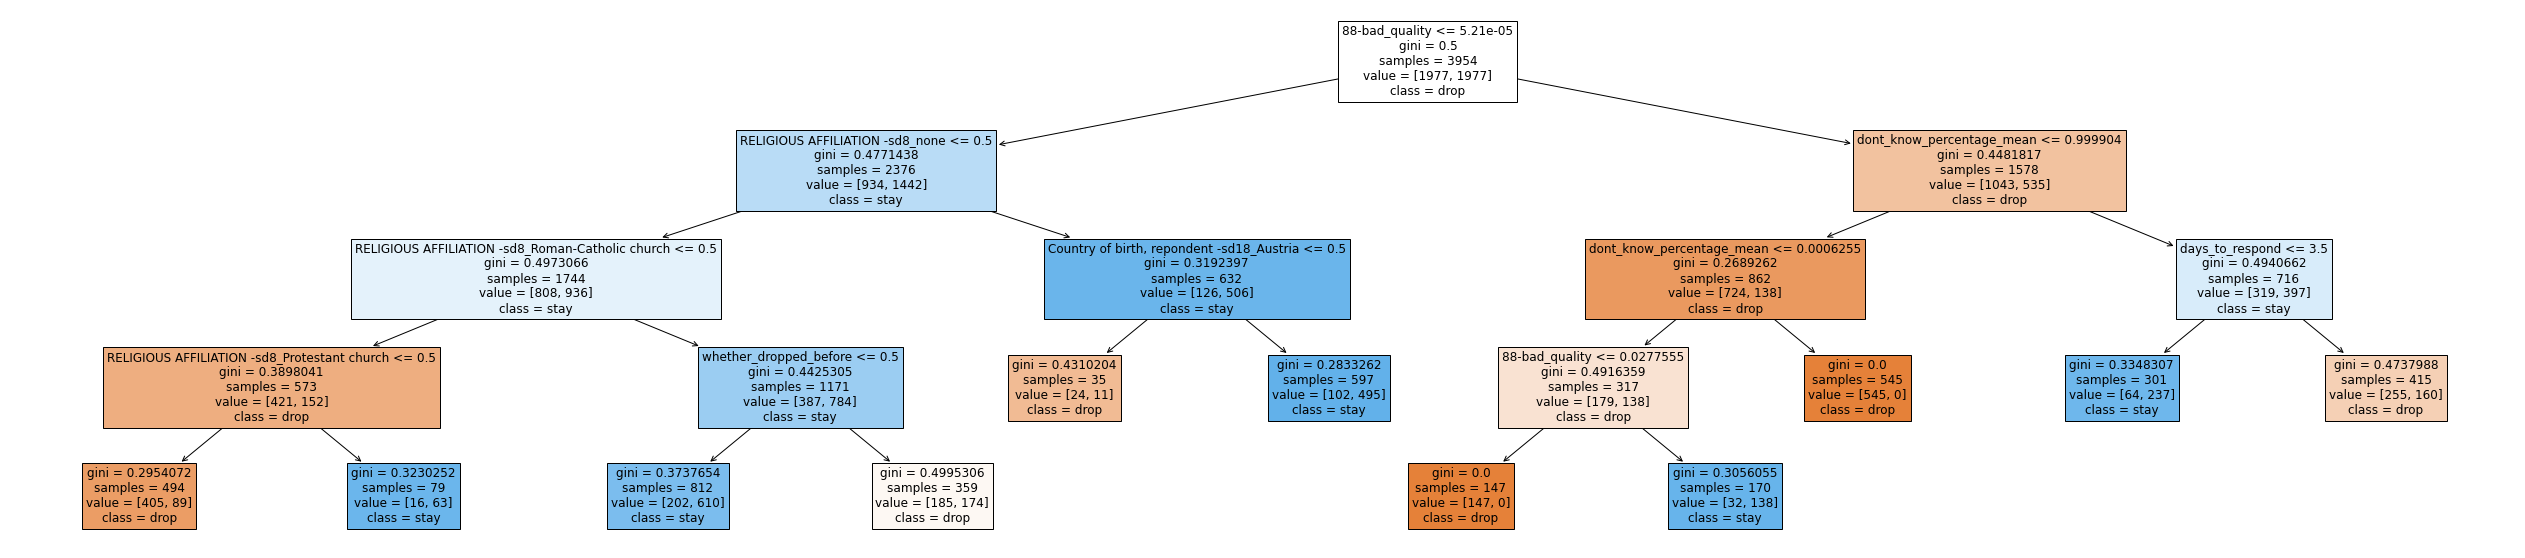

The most important features and its coefficients obtained by logistic regression:
Country of birth, father -sd20_Turkey :  8.189
FEDERAL STATE -sd4_Salzburg :  7.517
FEDERAL STATE -sd4_Carinthia :  7.308
FEDERAL STATE -sd4_Lower Austria :  7.303
FEDERAL STATE -sd4_Vienna :  7.263
FEDERAL STATE -sd4_Tyrol :  7.155
FEDERAL STATE -sd4_Upper Austria :  7.121
FEDERAL STATE -sd4_Styria :  7.083
PREVIOUS TYPE OF OCCUPATION -sd16_freelance worker :  7.044
FEDERAL STATE -sd4_Vorarlberg :  6.992
UNION MEMBERSHIP -sd21_don't know :  6.641
FEDERAL STATE -sd4_Burgenland :  6.62
GENDER -sd3_Prefer not to say :  6.53
UNION MEMBERSHIP -sd21_no :  6.431
EVER EMPLOYMENT -sd15_no, neither :  6.41
UNION MEMBERSHIP -sd21_yes :  6.191
TYPE OF OCCUPATION -sd14_farmer :  6.134
GENDER -sd3_Male :  5.998
PREVIOUS TYPE OF OCCUPATION -sd16_farmer :  5.728
GENDER -sd3_Female :  5.659
whether_dropped_before :  -1.457
know_politicians_ratio :  0.315
 
Personal and engineered features + gender/age_group interaction
D

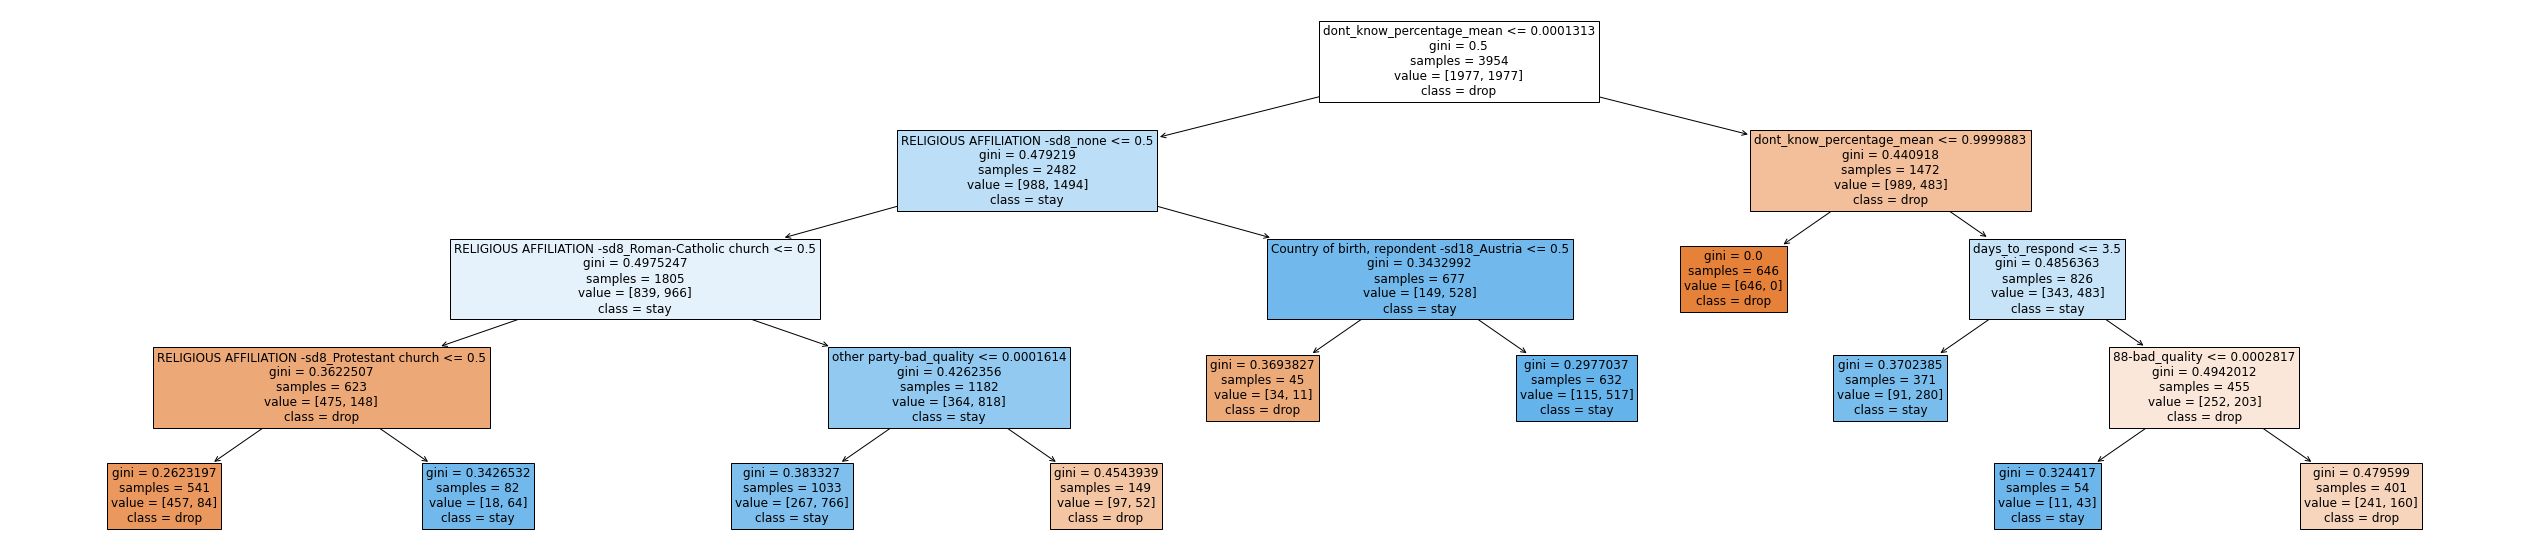

The most important features and its coefficients obtained by logistic regression:
FEDERAL STATE -sd4_Salzburg :  4.084
FEDERAL STATE -sd4_Lower Austria :  3.909
FEDERAL STATE -sd4_Carinthia :  3.881
FEDERAL STATE -sd4_Vienna :  3.788
FEDERAL STATE -sd4_Tyrol :  3.761
UNION MEMBERSHIP -sd21_don't know :  3.76
FEDERAL STATE -sd4_Styria :  3.729
FEDERAL STATE -sd4_Upper Austria :  3.671
FEDERAL STATE -sd4_Vorarlberg :  3.603
UNION MEMBERSHIP -sd21_no :  3.531
UNION MEMBERSHIP -sd21_yes :  3.39
FEDERAL STATE -sd4_Burgenland :  3.249
TYPE OF OCCUPATION -sd14_civil servant :  2.577
TYPE OF OCCUPATION -sd14_farmer :  2.561
TYPE OF OCCUPATION -sd14_self-employed with employees :  2.494
RELIGIOUS AFFILIATION -sd8_other :  2.423
ADDITIONAL OCCUPATION -sd13_more than 35h weekly :  2.42
ADDITIONAL OCCUPATION -sd13_in vocational training :  2.263
PREVIOUS TYPE OF OCCUPATION -sd16_blue-collar worker :  2.25
TYPE OF OCCUPATION -sd14_public official :  2.221
whether_dropped_before :  -1.379
know_polit

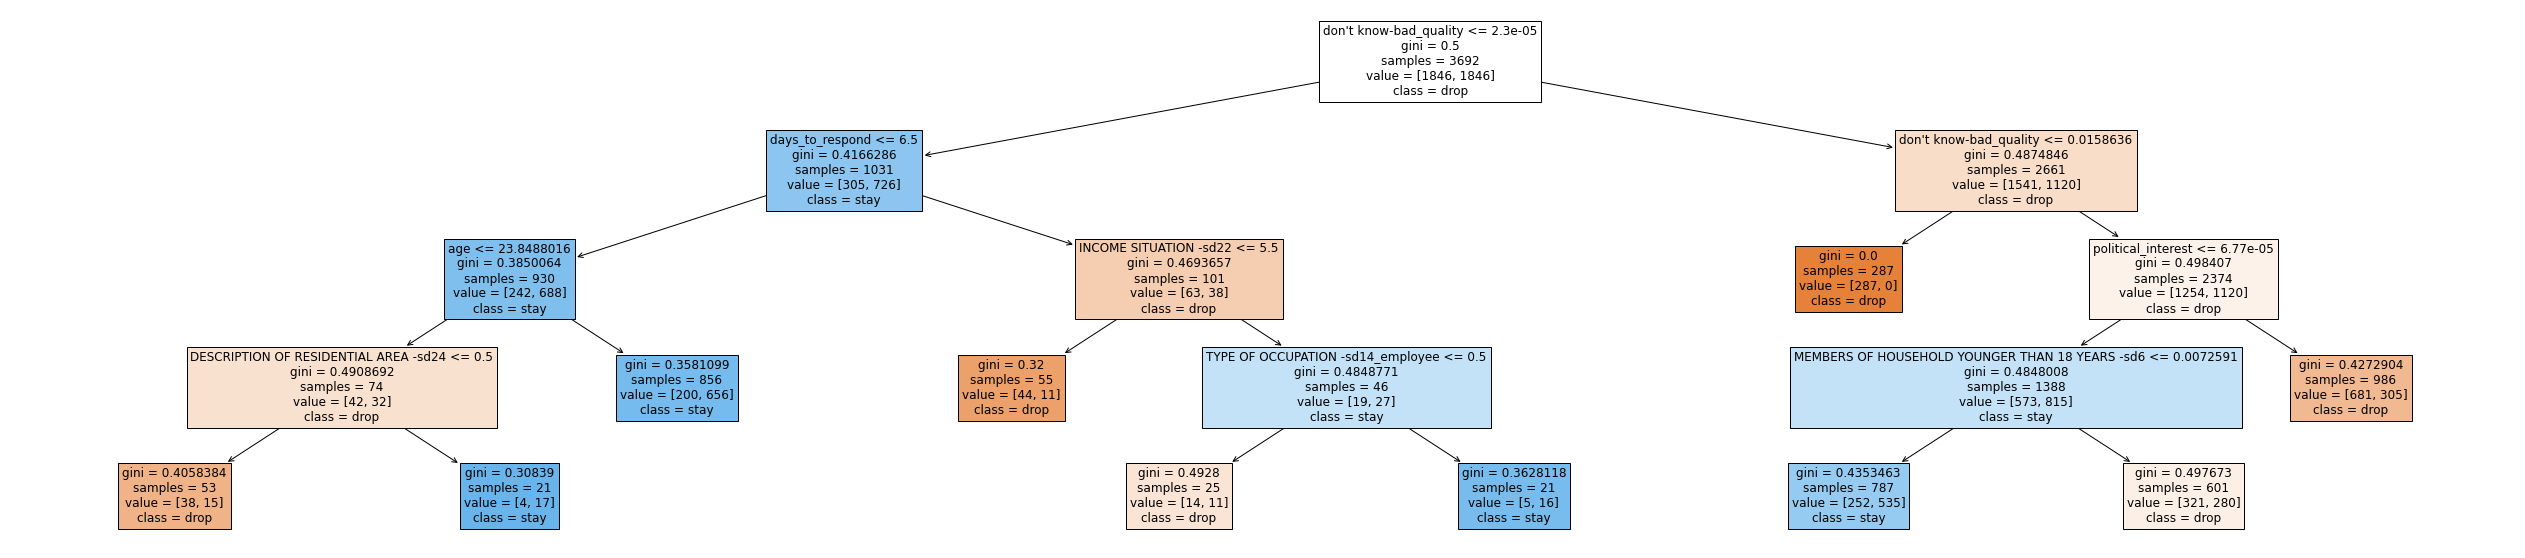

The most important features and its coefficients obtained by logistic regression:
UNION MEMBERSHIP -sd21_don't know :  5.553
FEDERAL STATE -sd4_Styria :  5.401
FEDERAL STATE -sd4_Lower Austria :  5.391
GENDER -sd3_Male :  5.345
FEDERAL STATE -sd4_Burgenland :  5.338
GENDER -sd3_Female :  5.306
PREVIOUS TYPE OF OCCUPATION -sd16_self-employed with employees :  5.288
FEDERAL STATE -sd4_Carinthia :  5.255
FEDERAL STATE -sd4_Tyrol :  5.239
FEDERAL STATE -sd4_Upper Austria :  5.22
FEDERAL STATE -sd4_Vorarlberg :  5.092
FEDERAL STATE -sd4_Salzburg :  5.044
UNION MEMBERSHIP -sd21_no :  5.04
UNION MEMBERSHIP -sd21_yes :  5.026
EVER EMPLOYMENT -sd15_no, neither :  5.009
FEDERAL STATE -sd4_Vienna :  4.732
PREVIOUS TYPE OF OCCUPATION -sd16_public official :  4.574
PREVIOUS TYPE OF OCCUPATION -sd16_civil servant :  4.572
PREVIOUS TYPE OF OCCUPATION -sd16_freelance worker :  4.523
GENDER -sd3_Prefer not to say :  4.459
whether_dropped_before :  -1.301
know_politicians_ratio :  0.0
 
Personal and eng

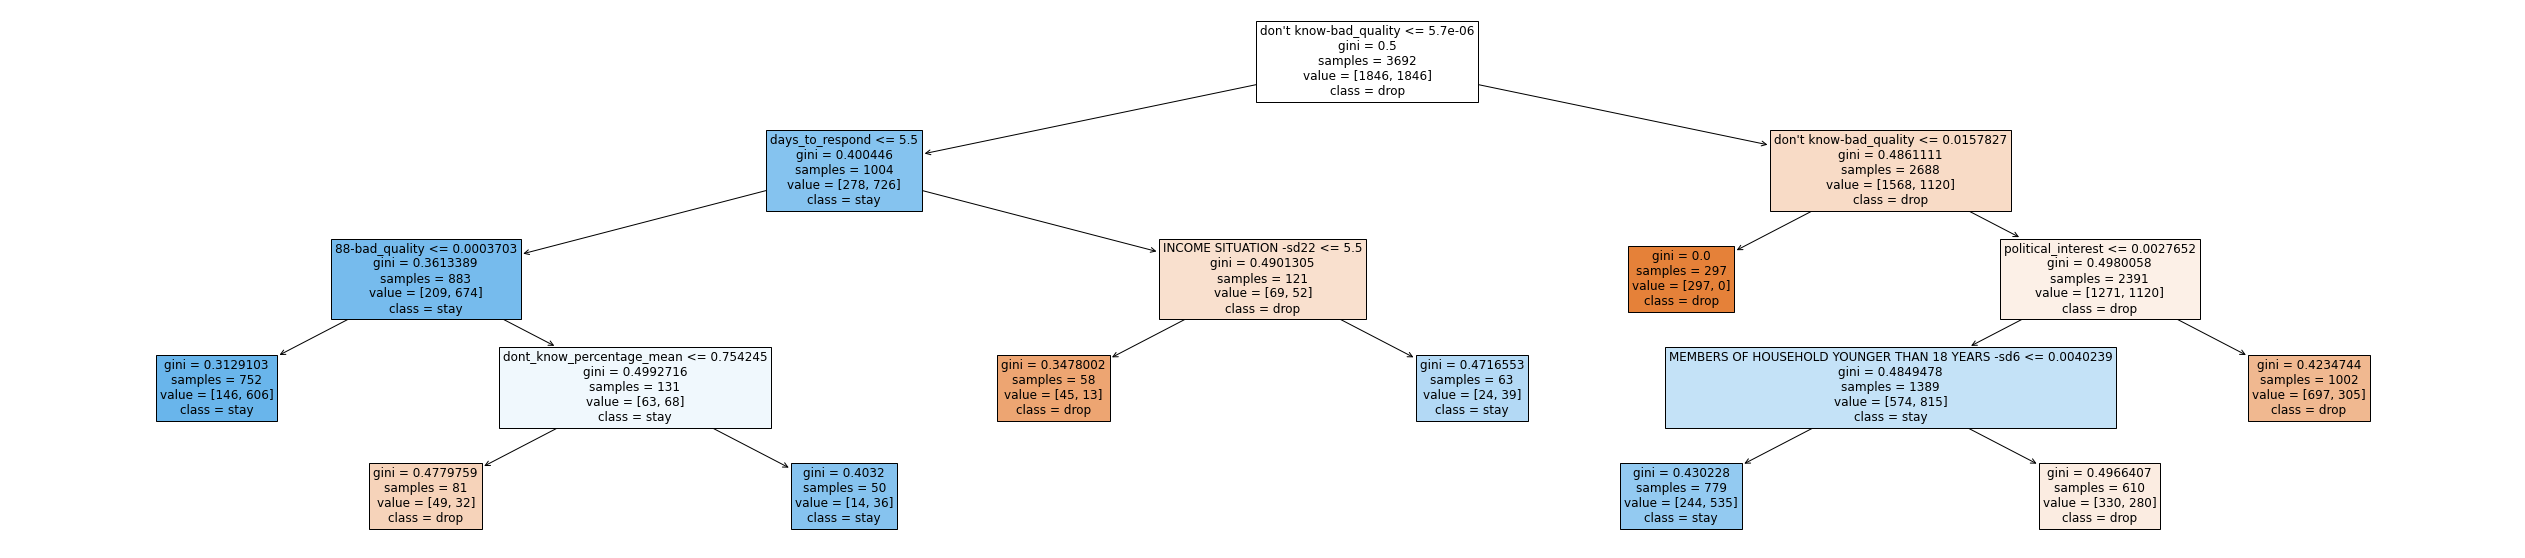

The most important features and its coefficients obtained by logistic regression:
0.0 :  10.084
age_group -sd2x2_Prefer not to say :  9.584
age_group -sd2x2_Female :  8.482
age_group -sd2x2_Male :  8.456
UNION MEMBERSHIP -sd21_don't know :  7.604
PREVIOUS TYPE OF OCCUPATION -sd16_freelance worker :  7.479
1.0 :  7.366
EVER EMPLOYMENT -sd15_no, neither :  7.291
FEDERAL STATE -sd4_Burgenland :  7.223
FEDERAL STATE -sd4_Styria :  7.188
FEDERAL STATE -sd4_Lower Austria :  7.188
FEDERAL STATE -sd4_Carinthia :  7.185
FEDERAL STATE -sd4_Upper Austria :  7.06
FEDERAL STATE -sd4_Tyrol :  7.059
UNION MEMBERSHIP -sd21_yes :  7.021
PREVIOUS TYPE OF OCCUPATION -sd16_self-employed with employees :  7.016
UNION MEMBERSHIP -sd21_no :  6.999
FEDERAL STATE -sd4_Vorarlberg :  6.985
FEDERAL STATE -sd4_Salzburg :  6.928
FEDERAL STATE -sd4_Vienna :  6.636
whether_dropped_before :  -1.324
know_politicians_ratio :  0.0


In [4]:
for wave in waves:
    
    df = pd.read_csv('../../data/data_online_personal_w' + wave + '.csv')
    political_data = pd.read_csv('../../data/data_online_political_w' + wave + '.csv')
    
    engineered = political_data.filter(regex='whether_dropped_before|inconsistency|bad_quality|weekend|know_politicians_ratio|same_agree_resp|political_interest|responded|dont_know_percentage_mean|days_to_respond')
    y = df['panelpat']
    #dte = df.filter(like='_dte', axis=1)
    X = df.drop(['panelpat'], axis=1) #, dte.columns[0]
    X = pd.concat([X, engineered], axis=1)
    cols = X.columns
    print(' ')
    
    print('WAVE: ', wave)
    print('Personal and engineered features:')
    print(Counter(y))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train, y_train = oversample.fit_resample(X_train, y_train)
    analysis_all_models(X_train, y_train, X_test, y_test, names)    
    
    age_dummies = X['age_group -sd2x2']
    age_dummies = pd.get_dummies(age_dummies, columns=['age_group -sd2x2'], dummy_na=True, prefix_sep='_')
    # https://stackoverflow.com/questions/42969545/interactions-between-dummies-variables-in-python
    gender = X.columns[X.columns.str.startswith('GENDER')]
    X = pd.concat([X, age_dummies], axis=1)
    age_group = X.filter(like='age_group', axis=1)

    for col1 in gender:
        for col2 in age_group:
            X[col2 + '_' + col1.split('_')[1]] = X[col1].mul(X[col2])
        
    for i in age_group:
        X = X.drop(i, axis=1)
    for i in gender:
        X = X.drop(i, axis=1)
    
    cols = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train, y_train = oversample.fit_resample(X_train, y_train)
    
    print(' ')
    print('Personal and engineered features + gender/age_group interaction')
    analysis_all_models(X_train, y_train, X_test, y_test, names)    

## X - only personal features, y - panelpat

 
WAVE:  1
Counter({1: 2839, 0: 777})
DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=20)
 


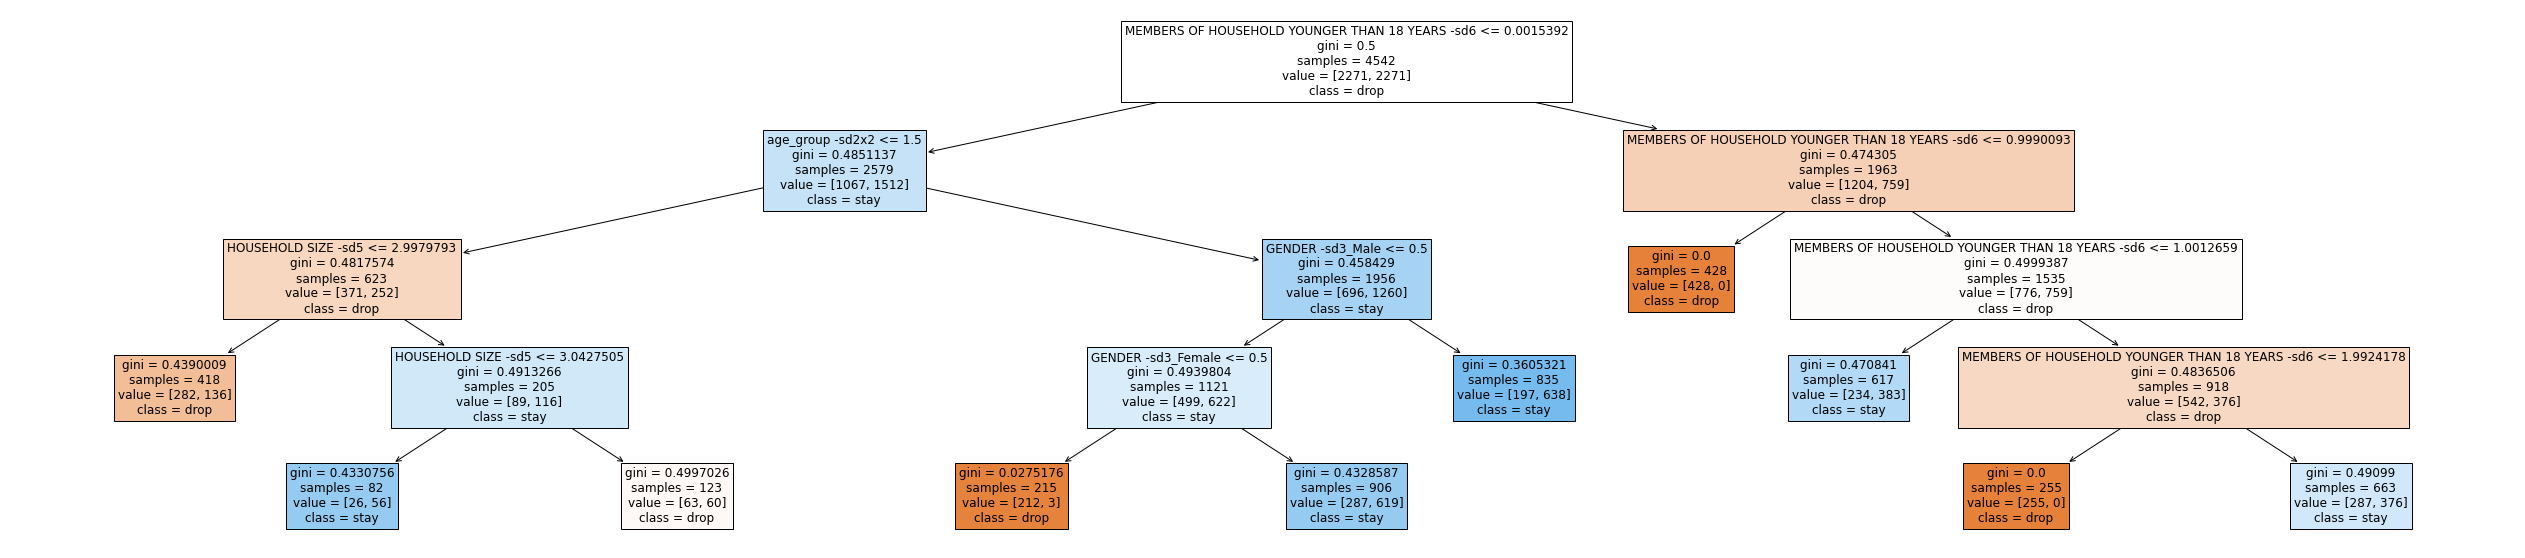

The most important features and its coefficients obtained by logistic regression:
PREVIOUS TYPE OF OCCUPATION -sd16_freelance worker :  9.01
FEDERAL STATE -sd4_Burgenland :  7.223
ADDITIONAL OCCUPATION -sd13_in vocational training :  7.188
FEDERAL STATE -sd4_Salzburg :  7.152
FEDERAL STATE -sd4_Carinthia :  7.135
CURRENT PERSONAL SITUATION -sd10_employed :  7.098
FEDERAL STATE -sd4_Styria :  7.039
FEDERAL STATE -sd4_Vorarlberg :  7.011
FEDERAL STATE -sd4_Tyrol :  7.003
PREVIOUS TYPE OF OCCUPATION -sd16_farmer :  6.908
FEDERAL STATE -sd4_Upper Austria :  6.873
FEDERAL STATE -sd4_Lower Austria :  6.845
FEDERAL STATE -sd4_Vienna :  6.776
GENDER -sd3_Male :  6.49
CURRENT PERSONAL SITUATION -sd10_military/civilian service, voluntary social year :  6.414
UNION MEMBERSHIP -sd21_no :  6.397
UNION MEMBERSHIP -sd21_yes :  6.275
GENDER -sd3_Female :  6.269
UNION MEMBERSHIP -sd21_don't know :  6.115
PREVIOUS TYPE OF OCCUPATION -sd16_civil servant :  5.898
voting_age_awareness_w1 :  0.173
whether_d

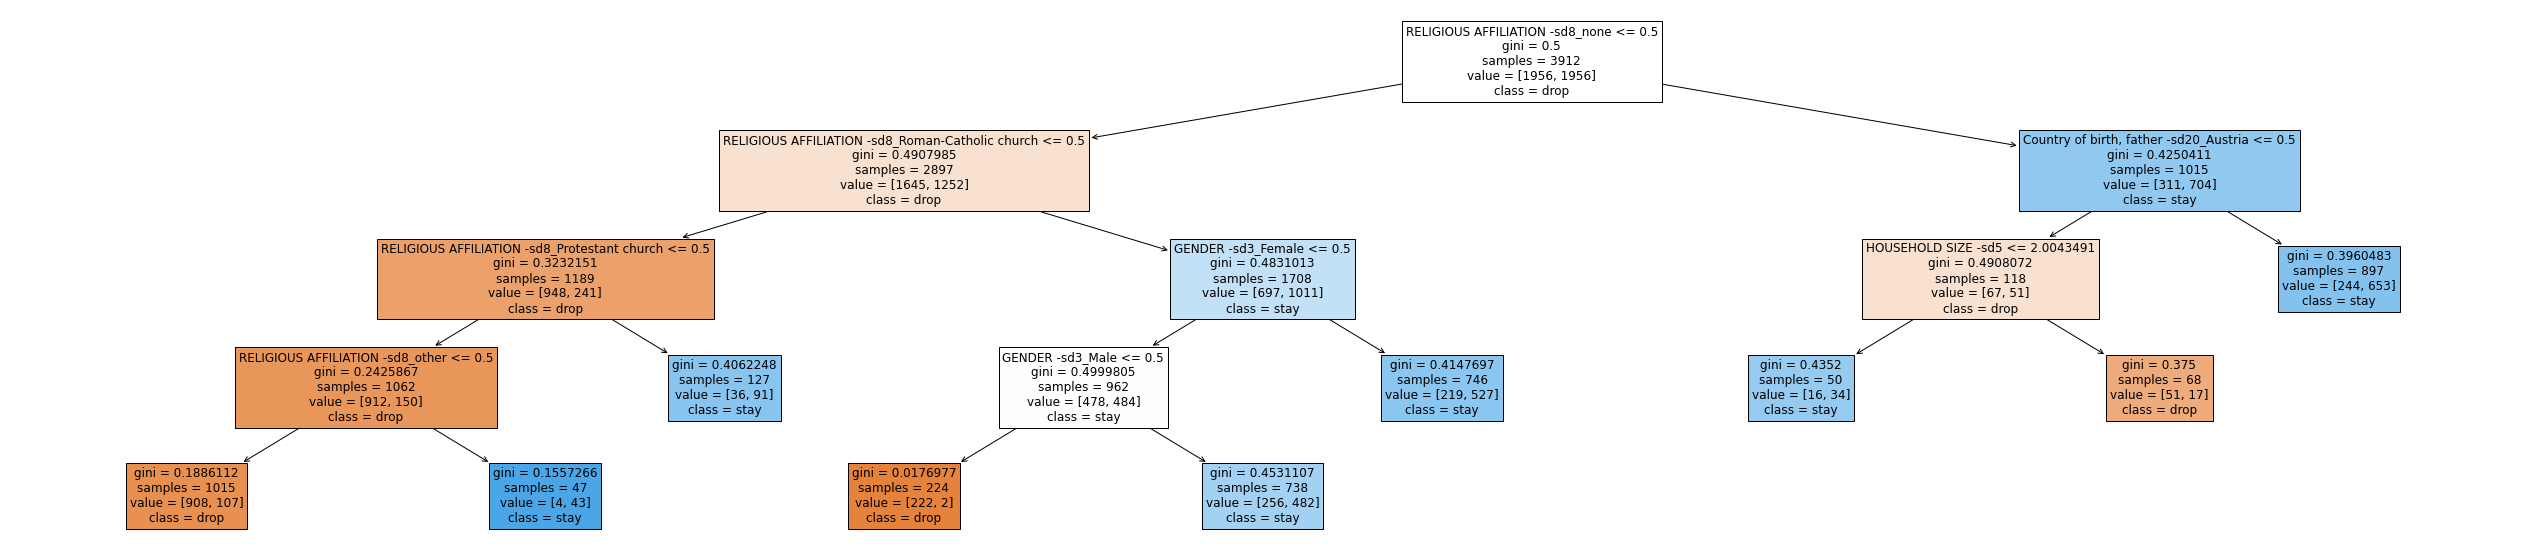

The most important features and its coefficients obtained by logistic regression:
CURRENT PERSONAL SITUATION -sd10_military/civilian service, voluntary social year :  8.885
FEDERAL STATE -sd4_Vorarlberg :  7.663
FEDERAL STATE -sd4_Tyrol :  7.66
Country of birth, father -sd20_Bosnia, Croatia, Serbia :  7.563
FEDERAL STATE -sd4_Burgenland :  7.482
FEDERAL STATE -sd4_Lower Austria :  7.448
FEDERAL STATE -sd4_Carinthia :  7.407
FEDERAL STATE -sd4_Styria :  7.353
FEDERAL STATE -sd4_Vienna :  7.309
FEDERAL STATE -sd4_Salzburg :  7.247
GENDER -sd3_Female :  7.149
FEDERAL STATE -sd4_Upper Austria :  7.122
GENDER -sd3_Male :  7.109
ADDITIONAL OCCUPATION -sd13_in vocational training :  6.613
UNION MEMBERSHIP -sd21_no :  6.519
GENDER -sd3_Prefer not to say :  6.501
UNION MEMBERSHIP -sd21_yes :  6.355
EVER EMPLOYMENT -sd15_no, neither :  6.261
UNION MEMBERSHIP -sd21_don't know :  6.234
Country of birth, father -sd20_Poland, Slovenia, Czech Republic, Hungary :  6.202
whether_dropped_before :  0.0
 

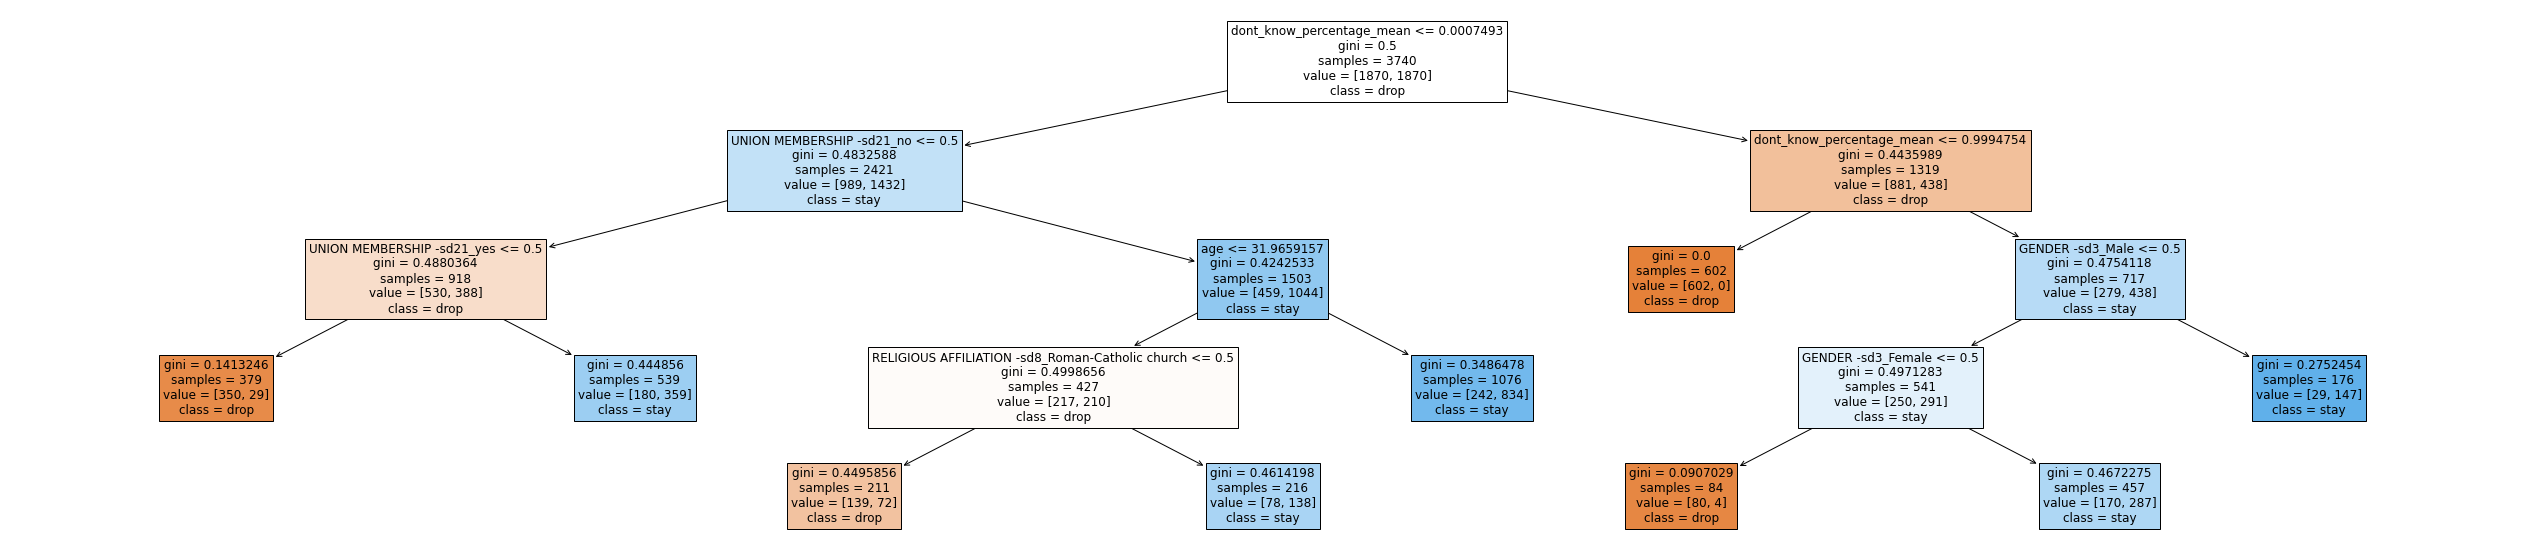

The most important features and its coefficients obtained by logistic regression:
CURRENT PERSONAL SITUATION -sd10_employed :  13.296
CURRENT PERSONAL SITUATION -sd10_military/civilian service, voluntary social year :  11.677
GENDER -sd3_Prefer not to say :  11.529
UNION MEMBERSHIP -sd21_no :  11.063
UNION MEMBERSHIP -sd21_don't know :  11.043
FEDERAL STATE -sd4_Carinthia :  11.021
UNION MEMBERSHIP -sd21_yes :  10.827
FEDERAL STATE -sd4_Salzburg :  10.645
FEDERAL STATE -sd4_Burgenland :  10.419
FEDERAL STATE -sd4_Upper Austria :  10.392
FEDERAL STATE -sd4_Styria :  10.295
FEDERAL STATE -sd4_Lower Austria :  10.262
GENDER -sd3_Male :  10.251
FEDERAL STATE -sd4_Vienna :  10.222
Country of birth, father -sd20_Turkey :  10.114
GENDER -sd3_Female :  10.077
FEDERAL STATE -sd4_Tyrol :  9.959
FEDERAL STATE -sd4_Vorarlberg :  9.718
Country of birth, father -sd20_Other country :  9.712
Country of birth, father -sd20_Austria :  9.244
whether_dropped_before :  -1.563
 
WAVE:  4
Counter({1: 2472, 0

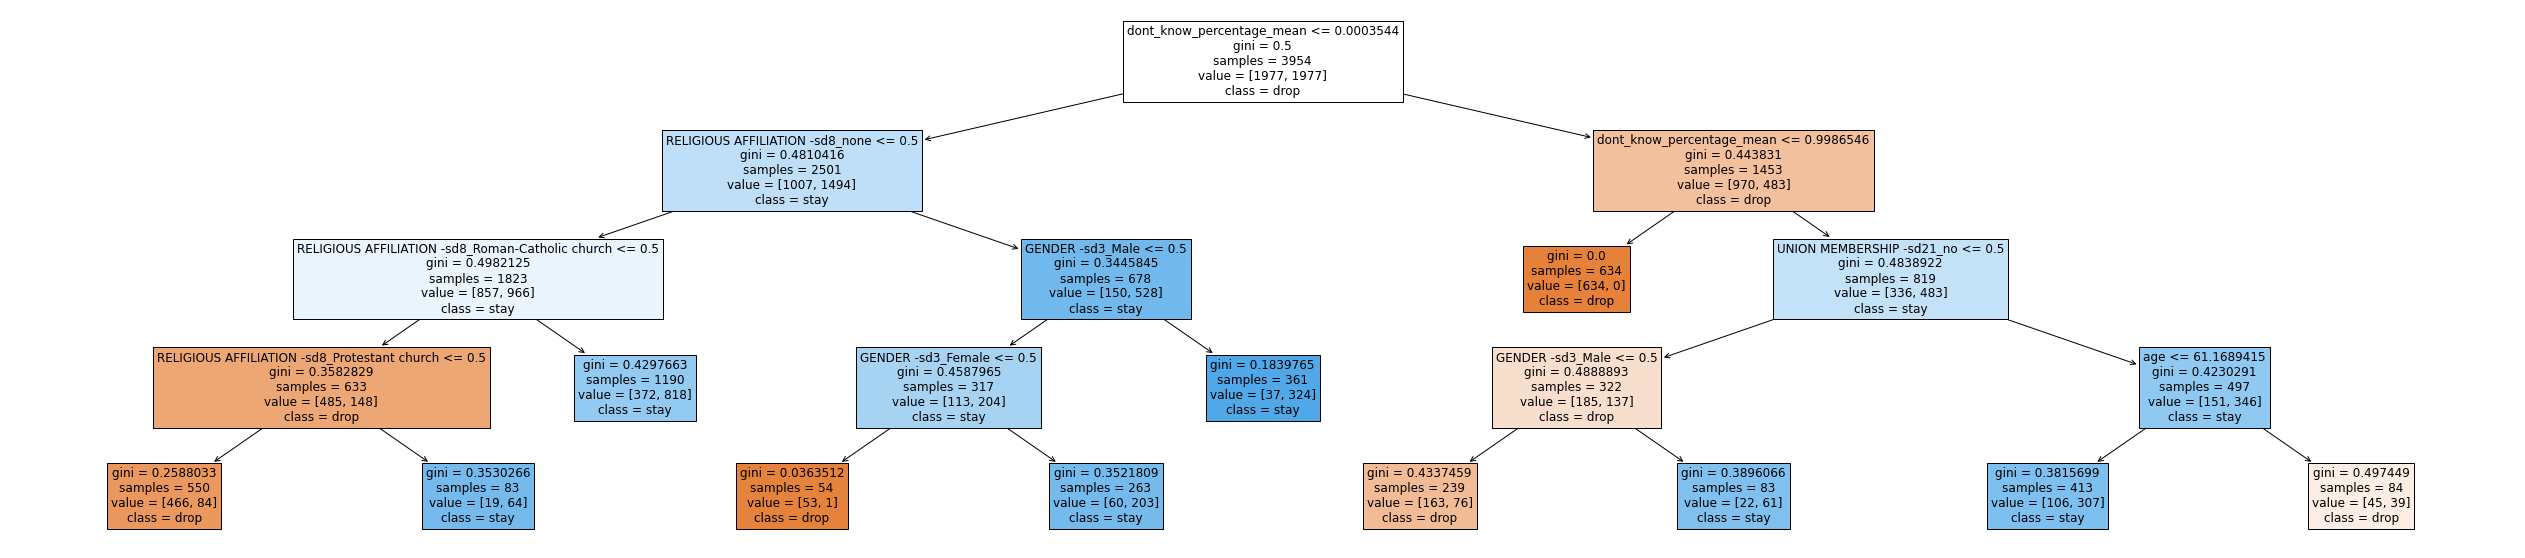

The most important features and its coefficients obtained by logistic regression:
Country of birth, father -sd20_Turkey :  8.544
GENDER -sd3_Prefer not to say :  7.945
PREVIOUS TYPE OF OCCUPATION -sd16_freelance worker :  7.912
FEDERAL STATE -sd4_Salzburg :  7.752
FEDERAL STATE -sd4_Vienna :  7.68
FEDERAL STATE -sd4_Carinthia :  7.541
FEDERAL STATE -sd4_Lower Austria :  7.498
FEDERAL STATE -sd4_Tyrol :  7.482
GENDER -sd3_Male :  7.447
FEDERAL STATE -sd4_Upper Austria :  7.431
FEDERAL STATE -sd4_Styria :  7.325
FEDERAL STATE -sd4_Vorarlberg :  7.268
EVER EMPLOYMENT -sd15_no, neither :  7.022
GENDER -sd3_Female :  7.013
FEDERAL STATE -sd4_Burgenland :  6.942
TYPE OF OCCUPATION -sd14_farmer :  6.905
UNION MEMBERSHIP -sd21_don't know :  6.816
UNION MEMBERSHIP -sd21_no :  6.658
PREVIOUS TYPE OF OCCUPATION -sd16_farmer :  6.462
PREVIOUS TYPE OF OCCUPATION -sd16_blue-collar worker :  6.29
whether_dropped_before :  -1.635
 
WAVE:  5
Counter({1: 2308, 0: 425})
DecisionTreeClassifier(class_weigh

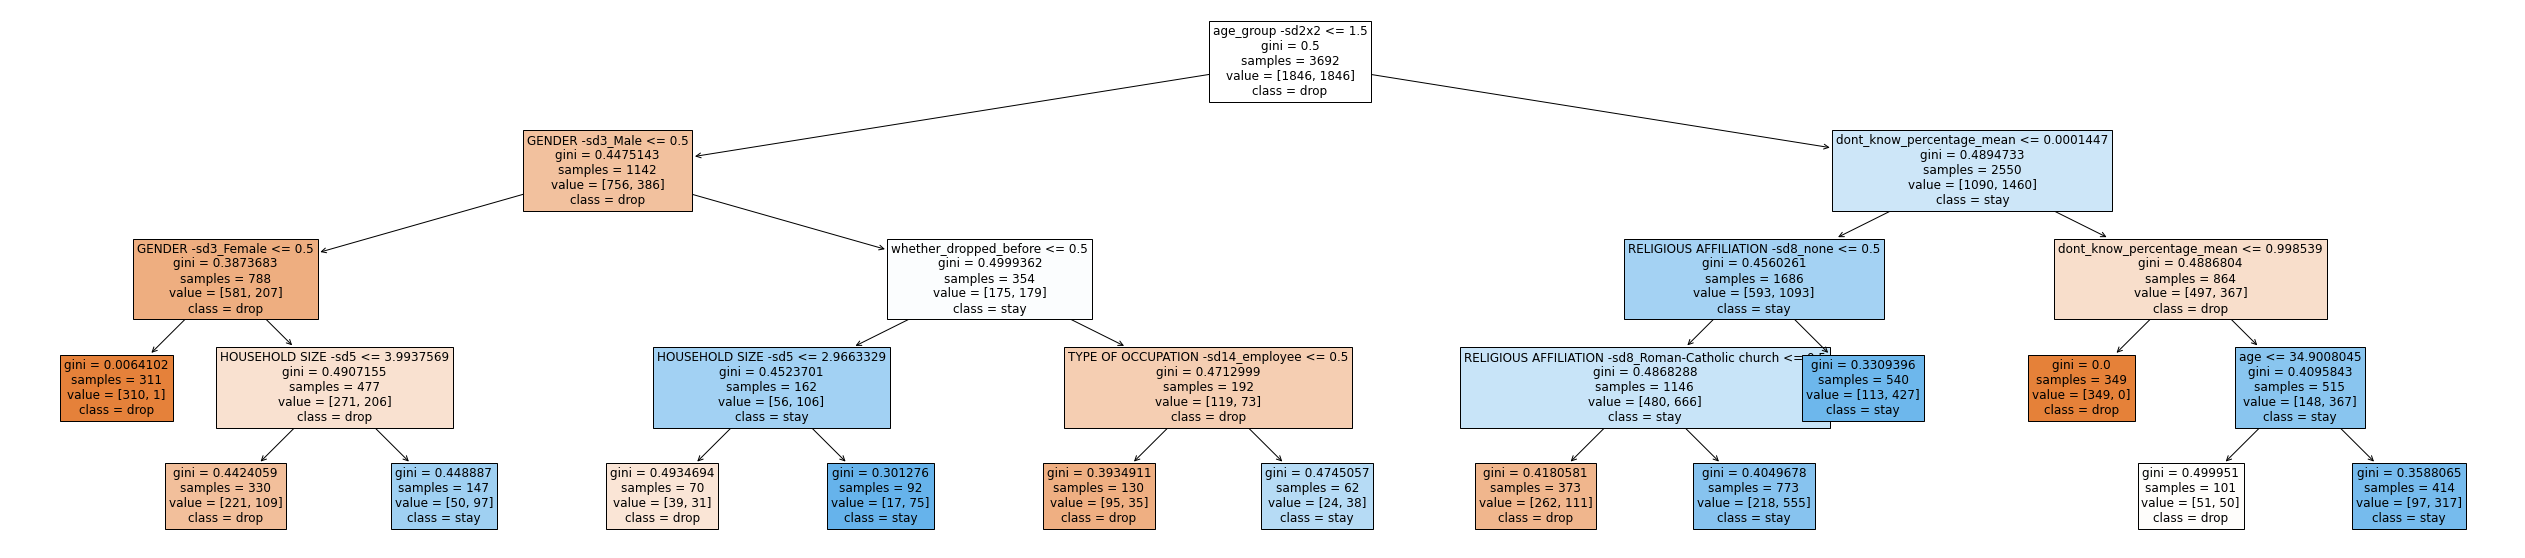

The most important features and its coefficients obtained by logistic regression:
EVER EMPLOYMENT -sd15_no, neither :  5.475
FEDERAL STATE -sd4_Burgenland :  5.441
FEDERAL STATE -sd4_Lower Austria :  5.347
FEDERAL STATE -sd4_Carinthia :  5.318
FEDERAL STATE -sd4_Styria :  5.295
FEDERAL STATE -sd4_Upper Austria :  5.276
FEDERAL STATE -sd4_Tyrol :  5.256
FEDERAL STATE -sd4_Salzburg :  5.221
FEDERAL STATE -sd4_Vorarlberg :  5.094
UNION MEMBERSHIP -sd21_don't know :  4.863
GENDER -sd3_Male :  4.835
FEDERAL STATE -sd4_Vienna :  4.833
GENDER -sd3_Female :  4.79
PREVIOUS TYPE OF OCCUPATION -sd16_self-employed with employees :  4.666
ADDITIONAL OCCUPATION -sd13_in vocational training :  4.455
TYPE OF OCCUPATION -sd14_freelance worker :  4.418
UNION MEMBERSHIP -sd21_yes :  4.387
UNION MEMBERSHIP -sd21_no :  4.366
TYPE OF OCCUPATION -sd14_farmer :  4.216
GENDER -sd3_Prefer not to say :  4.199
whether_dropped_before :  -1.495


In [5]:
for wave in waves:
    
    df = pd.read_csv('../../data/data_online_personal_w' + wave + '.csv')
    
    y = df['panelpat']
    #dte = df.filter(like='_dte', axis=1)
    X = df.drop(['panelpat'], axis=1) #, dte.columns[0]
    cols = X.columns
    print(' ')
    print('WAVE: ', wave)
    print(Counter(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    X_train, y_train = oversample.fit_resample(X_train, y_train)
    analysis_all_models(X_train, y_train, X_test, y_test, names)
    

In [6]:
choose_y = ['y - panelpat: all features'] * 25 + ['y - panelpat: pers+engin'] * 25 + ['y - panelpat: pers+engin, age_gender'] * 25 + ['y - panelpat: personal only'] * 25
wave_list = [x for item in waves for x in repeat(item, 5)]*4

In [7]:
final_results = pd.DataFrame(zip(choose_y,
                                 precision_stay_final, 
                                 precision_drop_final, 
                                 recall_stay_final, 
                                 recall_drop_final, 
                                 recall_general_final,
                                 accuracy_final,
                                 clf_list, 
                                 wave_list,
                                 class_imbalance_final)).T

final_results_test = pd.DataFrame(zip(choose_y,
                                 precision_stay_test, 
                                 precision_drop_test, 
                                 recall_stay_test, 
                                 recall_drop_test, 
                                 recall_general_test,
                                 accuracy_test,
                                 clf_test, 
                                 wave_list,
                                 class_imbalance_test)).T
#final_results = final_results.drop([3], axis=1)
#final_results.columns = list_of_all_models
final_results.index = ['choose_y',
                      'precision_stay, %',
                      'precision_drop, %',
                      'recall_stay, %',
                      'recall_drop, %',
                      'recall_general, %',
                      'accuracy, %',
                      'clf',
                      'wave',
                      'class proportions']
final_results_test.index = final_results.index

final_results = final_results.round(3)
final_results_test = final_results_test.round(3)
#final_results = final_results.mul(100)

final_results = final_results.T.sort_values(by=['recall_drop, %'], ascending=False)
final_results_test = final_results_test.T.sort_values(by=['recall_drop, %'], ascending=False)

#final_results

In [8]:
final_results[['precision_stay, %', 'precision_drop, %', 'recall_stay, %',
       'recall_drop, %', 'recall_general, %', 'accuracy, %', 'class proportions']] = final_results[['precision_stay, %', 'precision_drop, %', 'recall_stay, %',
       'recall_drop, %', 'recall_general, %', 'accuracy, %', 'class proportions']].apply(pd.to_numeric)
final_results = final_results.round(decimals=3)

final_results_test[['precision_stay, %', 'precision_drop, %', 'recall_stay, %',
       'recall_drop, %', 'recall_general, %', 'accuracy, %', 'class proportions']] = final_results_test[['precision_stay, %', 'precision_drop, %', 'recall_stay, %',
       'recall_drop, %', 'recall_general, %', 'accuracy, %', 'class proportions']].apply(pd.to_numeric)
final_results_test = final_results_test.round(decimals=3)

In [9]:
from pivottablejs import pivot_ui
from IPython.display import HTML

In [10]:
pivot_ui(final_results, outfile_path='../../results_html/online_y_panelpat_cv_SMOTE.html')
HTML('online_y_panelpat_cv_SMOTE.html')

pivot_ui(final_results_test, outfile_path='../../results_html/online_y_panelpat_test_SMOTE.html')
HTML('online_y_panelpat_test_SMOTE.html')

short results:
* DT give 63-66% mean recall for both classes and all the waves (y - panelpat: pers+engin, age_gender, with other datasets 1 wave is ~54%)
* LR, LinearSVC give 65-66% mean recall for both classes and all the waves (y - panelpat: pers+engin, age_gender)
* other datasets are not stable across the waves at all :(